In [2]:
import pandas as pd
# df_results = pd.read_csv('../data/content_res_gpt_no_cot_no_con_mini.csv')
df_results = pd.read_csv('../data/content_res_gpt_4o_cot_con.csv')
df_results = df_results.drop(columns=['None of the above'])

df_res = df_results.copy()

In [3]:
import textwrap
df_results.columns = [textwrap.fill(col, width=15) for col in df_results.columns]

df_res

,Rising Production Costs,Opposition to EU Free-Trade Agreements,Environmental Regulations and Agricultural Standards,Bureaucratic Constraints,Opposition to Foreign Agricultural Imports,Subsidy Cuts,Climate and Natural Disaster Relief,Labor and Social Conditions,Solidarity Movements,Opposition to Renewable Energy Projects,Economic Struggles and Agricultural Livelihoods,Consumer Awareness Initiatives,Livestock and Animal Welfare Protests,Opposition to Non-Traditional Products,Infrastructure and Transport Policies,National and Local State Support,Fair Compensation and Market Practices,Miscellaneous Agriculture-Related Protests
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4638,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
df_main = pd.read_csv('../data/df_main_protests.csv')

df_main['description'] = df_main['description'].astype(str)
# df_main['description'] = df_main['description'].fillna('')
df_main = df_main.reset_index(drop=True)
df_main.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'population_best', 'month', 'description'],
      dtype='object')

# Bubble Chart

In [5]:
df_reasons_count = pd.DataFrame(df_results.sum(), columns=['occurence'])

df_reasons_count_sorted = df_reasons_count.sort_values(by='occurence', ascending=False).reset_index(names=['reason'])

# df_reasons_count = df_reasons_count[df_reasons_count['reason'] != 'None of the above']
df_reasons_count

df_reasons_count = df_reasons_count.reset_index(names='reason')
df_reasons_count_sorted['color'] = "blue"

In [7]:
%run fcn_bubble_chart.py

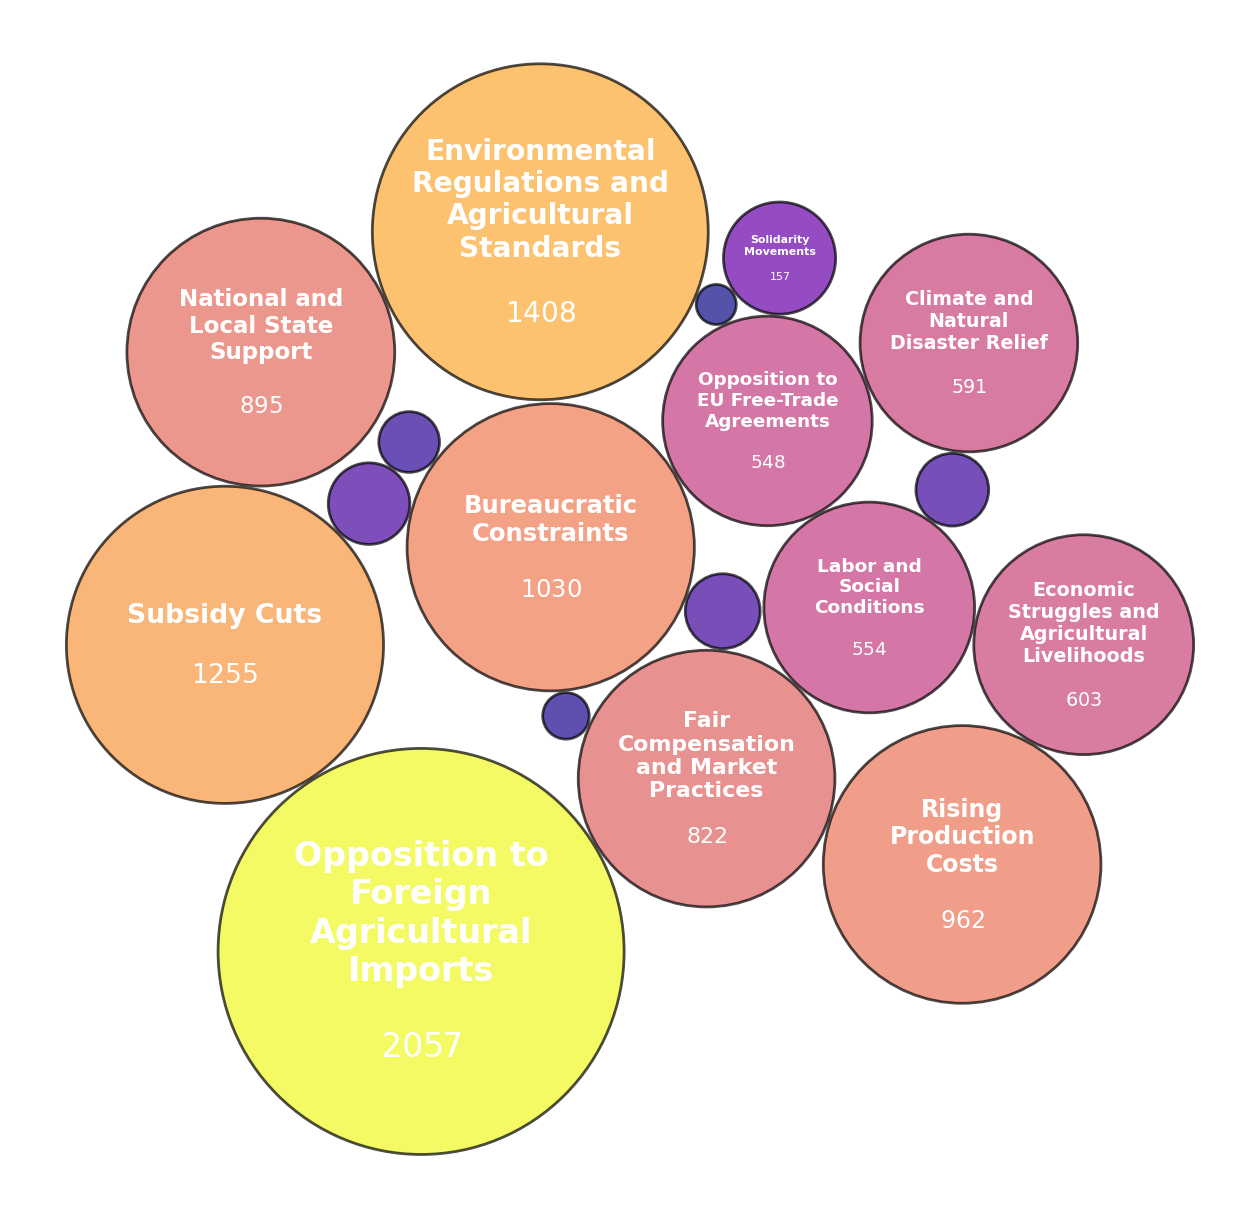

In [8]:
### import matplotlib.pyplot as plt
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, TextArea, HPacker)
from matplotlib.patches import Circle
import numpy as np
from matplotlib import cm, colors
plt.rcParams["mathtext.fontset"]

df_shuffled = df_reasons_count.sample(frac=1, random_state=2).reset_index(drop=True)
df_shuffled['occurence_str'] = "$" +df_shuffled['occurence'].astype(str)+"$"


#STEP 3
bubble_chart = BubbleChart(area=df_shuffled['occurence'],bubble_spacing=0.3)
#STEP 4
bubble_chart.collapse()

#STEP 5
fig, ax = plt.subplots(figsize=(16,16),subplot_kw=dict(aspect="equal"))

# fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, df_shuffled["reason"].astype(str) +"\n\n"+df_shuffled['occurence_str'], cmap_name='plasma',
    min_font=4, max_font=24,label_font_threshold=7)



# bubble_chart.bubbles[:, 0] *= 2  # make layout more horizontal
bubble_chart.collapse()
ax.set_aspect("equal")
ax.axis("off")
ax.relim()
ax.autoscale_view()


# --- Add COLOR LEGEND (colormap legend) ---

# 1. Define normalization and colormap
#cmap = plt.cm.plasma
#norm = colors.Normalize(vmin=df_shuffled['occurence'].min(),
#                        vmax=df_shuffled['occurence'].max())

# 2. Create a colorbar next to the plot
#cbar = fig.colorbar(
#    cm.ScalarMappable(norm=norm, cmap=cmap),
#    ax=ax,
#    fraction=0.03,      # width of colorbar relative to plot
#    pad=0.09,           # spacing between plot and colorbar
#)

# 3. Customize colorbar labels and title
#cbar.set_label('Occurrences', rotation=270, labelpad=25, fontsize=14, fontweight='bold')
#cbar.ax.tick_params(labelsize=12) 

plt.show()

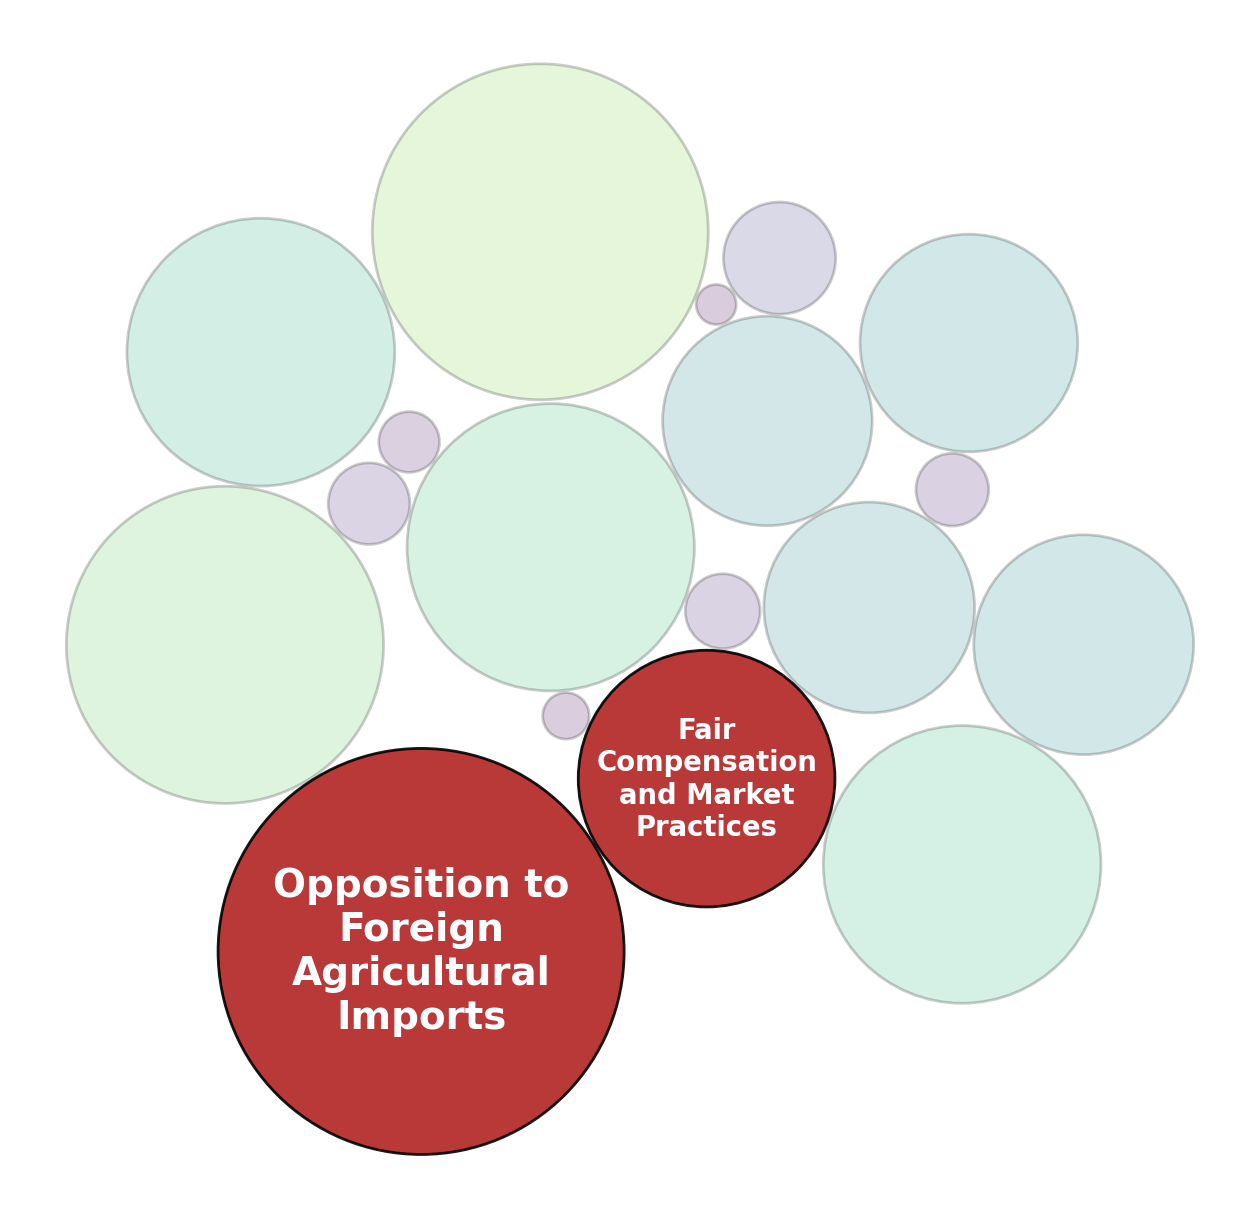

In [9]:
### import matplotlib.pyplot as plt
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, TextArea, HPacker)
from matplotlib.patches import Circle
import numpy as np
from matplotlib import cm, colors
plt.rcParams["mathtext.fontset"]

df_shuffled = df_reasons_count.sample(frac=1, random_state=2).reset_index(drop=True)
df_shuffled['occurence_str'] = "$" +df_shuffled['occurence'].astype(str)+"$"


#STEP 3
bubble_chart = BubbleChart(area=df_shuffled['occurence'],bubble_spacing=0.3)
#STEP 4
bubble_chart.collapse()

#STEP 5
fig, ax = plt.subplots(figsize=(16,16),subplot_kw=dict(aspect="equal"))

# fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.highlight(highlight_indices=[1, 2], ax=ax, labels=df_shuffled["reason"])



# bubble_chart.bubbles[:, 0] *= 2  # make layout more horizontal
bubble_chart.collapse()
ax.set_aspect("equal")
ax.axis("off")
ax.relim()
ax.autoscale_view()


# --- Add COLOR LEGEND (colormap legend) ---

# 1. Define normalization and colormap
#cmap = plt.cm.plasma
#norm = colors.Normalize(vmin=df_shuffled['occurence'].min(),
#                        vmax=df_shuffled['occurence'].max())

# 2. Create a colorbar next to the plot
#cbar = fig.colorbar(
#    cm.ScalarMappable(norm=norm, cmap=cmap),
#    ax=ax,
#    fraction=0.03,      # width of colorbar relative to plot
#    pad=0.09,           # spacing between plot and colorbar
#)

# 3. Customize colorbar labels and title
#cbar.set_label('Occurrences', rotation=270, labelpad=25, fontsize=14, fontweight='bold')
#cbar.ax.tick_params(labelsize=12) 

plt.show()

# Spatial stuff

In [10]:
reason_list= ["All protests",
              'Opposition to Foreign\nAgricultural Imports',
              'Environmental Regulations\nand Agricultural Standards',
              'Subsidy Cuts',
              'Bureaucratic Constraints',
              'Rising Production Costs',
              'National and Local State\nSupport',
              'Fair Compensation and\nMarket Practices',
              'Climate and Natural\nDisaster Relief',
              'Economic Struggles and\nAgricultural Livelihoods',
              'Labor and Social\nConditions', 
              'Opposition to EU Free-\nTrade Agreements',
              'Solidarity Movements',
              'Infrastructure and\nTransport Policies',
              'Livestock and Animal\nWelfare Protests',
              'Miscellaneous Agriculture-\nRelated Protests',
              'Opposition to Non-\nTraditional Products',    
              'Opposition to Renewable\nEnergy Projects',
              'Consumer Awareness\nInitiatives'
             ]

In [11]:
import geopandas as gpd
point_df = gpd.GeoDataFrame(
    df_main,
    geometry=gpd.points_from_xy(df_main.longitude, df_main.latitude),
    crs="WGS1984"
)

point_df = point_df.to_crs(epsg=3035)

point_df.plot()

ModuleNotFoundError: No module named 'geopandas'

# Ripley

In [15]:
import geopandas as gpd
from shapely.geometry import Polygon
# Make polygon from bbox coordinates https://stackoverflow.com/a/68741143/18253502
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])
    
bbox = make_bbox(-11,35,30.292969,74.543330)

bbox_gdf = gpd.GeoDataFrame(index=[0], crs='WGS1984', geometry = [bbox])
europe_countries = ['ALB', 'AND', 'AUT', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 
                    'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'XKX', 
                    'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 
                    'NOR', 'POL', 'PRT', 'ROU', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 
                    'CHE', 'UKR', 'GBR', 'VAT']

df_results_full = pd.concat([df_main, df_results], axis=1)

gdf = gpd.GeoDataFrame(
    df_results_full, geometry=gpd.points_from_xy(df_results_full.longitude, df_results_full.latitude), crs="EPSG:4326"
)

# Remove points outside bounding box
mask = gdf.geometry.intersects(bbox_gdf.unary_union)  # Create mask
gdf = gdf[mask]  # Filter GeoDataFrame
gdf = gdf.to_crs(epsg=3035)


# Select columns
gdf['event_date'] = pd.to_datetime(gdf['event_date'])
gdf['month'] = gdf['event_date'].dt.to_period('M')
gdf['month_year'] = gdf['event_date'].dt.strftime('%B %Y')

gdf['days_since_first'] = (gdf['event_date'] - gdf['event_date'].min()).dt.days
gdf['All protests'] = 1

C:\Users\cstetter\AppData\Local\Temp\ipykernel_33084\50729869.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mask = gdf.geometry.intersects(bbox_gdf.unary_union)  # Create mask


# G function

In [13]:
import numpy as np
from pointpats import distance_statistics

def G_find_max_dist(gdf, col, support=150000, n_simulations=99):
    """
    Maximum distance at which the observed and empirical Ripley’s G functions intersect,
    ensuring that the spatial cutoff reflects the scale at which clustering deviates 
    from randomness. Interpolated between two points where intersection occurs.

    Parameters
    ----------
    gdf : GeoDataFrame
        Input geospatial dataframe.
    col : str
        Column to filter on (e.g. binary indicator variable).
    support : int, optional
        Maximum distance for the G-function evaluation (default 150000).
    n_simulations : int, optional
        Number of simulations to build the null distribution (default 99).

    Returns
    -------
    dict
        {
            "g_test": g_test object,
            "empirical": empirical G function,
            "median_sim": theoretical/simulation median,
            "max_dist": maximum distance of deviation (float or None)
        }
    """
    # Subset input
    input_df = gdf[gdf[col] == 1]

    s_coordinates = np.column_stack((input_df.geometry.x, input_df.geometry.y))

    # Run G-test
    g_test = distance_statistics.g_test(
        s_coordinates, 
        support=(0,500000,500), 
        keep_simulations=True, 
        n_simulations=n_simulations
    )

    # Extract empirical G
    empirical = g_test.statistic  

    # Median of simulations
    median_sim = np.median(g_test.simulations, axis=0)
    upper95_sim =  np.percentile(g_test.simulations, 97.5, axis=0)

    # Find intersection points (where sign changes between empirical - median)
    cross_indices = np.where(np.diff(np.sign(empirical - upper95_sim)) != 0)[0]

    cross_distances = []
    for idx in cross_indices:
        x0, x1 = g_test.support[idx], g_test.support[idx + 1]
        y0, y1 = empirical[idx] - upper95_sim[idx], empirical[idx + 1] - upper95_sim[idx + 1]
        if y1 != y0:  # avoid divide by zero
            # Linear interpolation for crossing
            x_cross = x0 - y0 * (x1 - x0) / (y1 - y0)
            cross_distances.append(x_cross)


    return {
        "g_test": g_test,
        "empirical": empirical,
        "median_sim": median_sim,
        "cross_distances": cross_distances
    }

In [14]:
from tqdm import tqdm
results = {}
for reason in tqdm(reason_list[1:]):
    results[reason] = G_find_max_dist(gdf, reason, support=500000, n_simulations=10000)

100%|██████████████████████████████████████████| 18/18 [21:11<00:00, 70.64s/it]


In [24]:
import pickle

with open("global_knox_results.pkl", "wb") as f:
    pickle.dump(results, f)

Intersection: 71142.28456913828
Intersection: 81162.3246492986
Intersection: 71643.2865731463
Intersection: 79134.92354358525
Intersection: 80661.3226452906
Intersection: 98697.3947895792
Intersection: 116216.50163071237
Intersection: 108211.31189124413
Intersection: 114228.45691382766
Intersection: 99198.39679358718
Intersection: 84168.3366733467
Intersection: 154308.61723446895
Intersection: 217434.86973947898
Intersection: 198396.79358717435
Intersection: 274549.0981963928
Intersection: 271543.0861723447
Intersection: 42084.16833667335
Intersection: 76152.30460921844


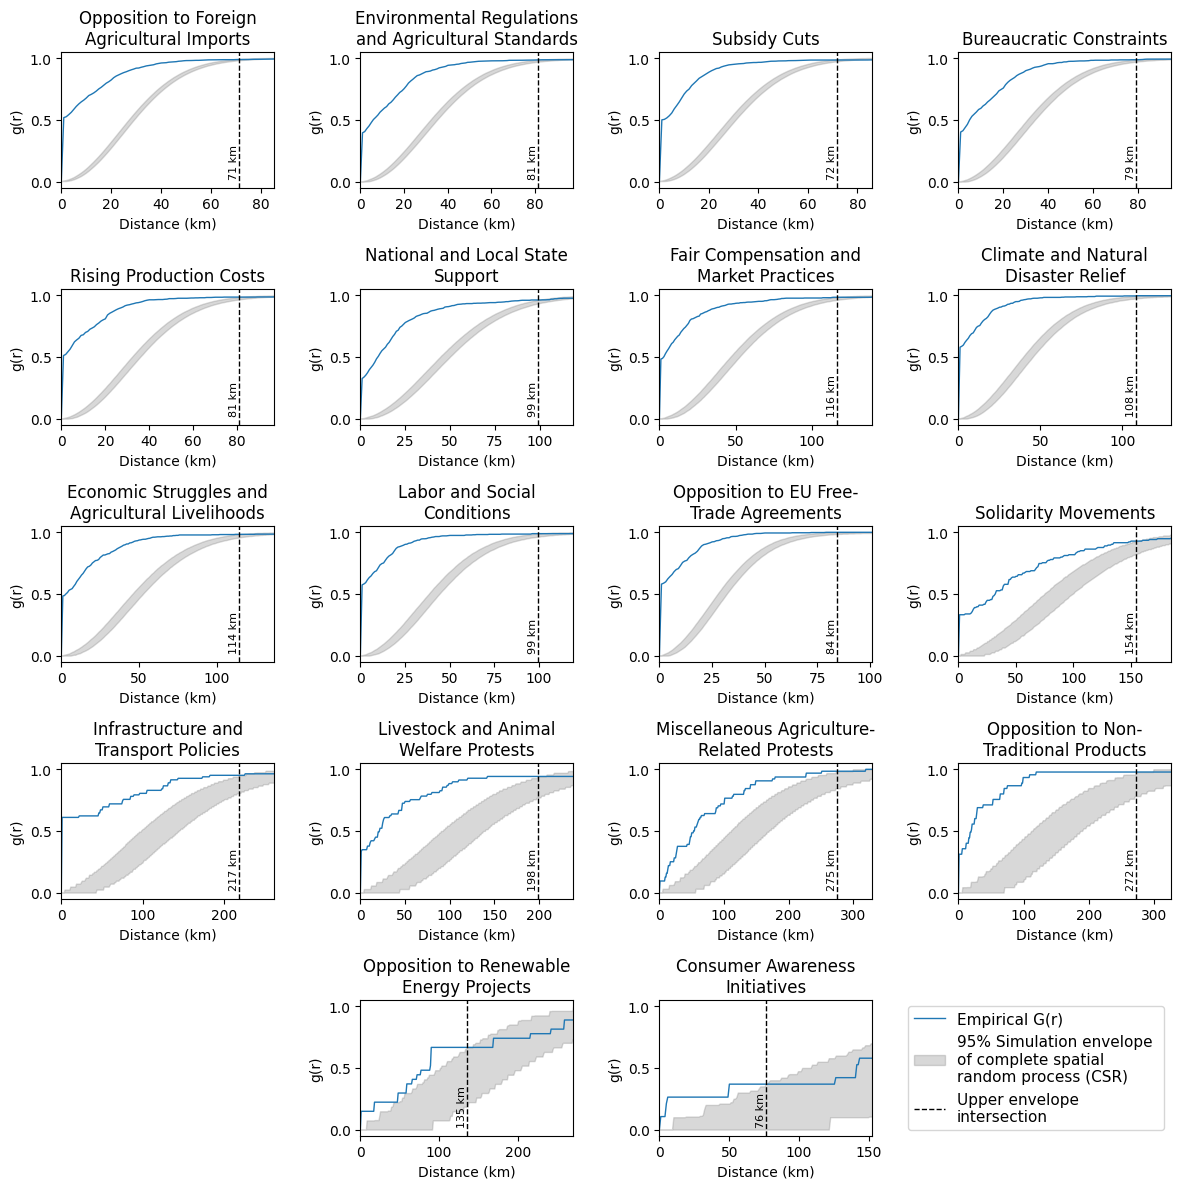

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

n_rows, n_cols = 5, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.flatten()

plotted_axes = []  # keep track of where data was plotted
n_reasons = len(reason_list[1:])

for i, res_name in enumerate(reason_list[1:]):
    if i >= n_rows * n_cols:
        break  # stop if more reasons than subplot slots

    res = results[res_name]
    g_test = res['g_test']

    # --- Shift last two plots to col 1 & 2 ---
    if i >= n_reasons - 2:  # last two plots
        row = i // n_cols
        ax_index = row * n_cols + 1 + (i % 2)  # force col 1,2
        ax = axes[ax_index]
    else:
        ax = axes[i]

    plotted_axes.append(ax)

    print("Intersection:", res['cross_distances'][1])

    # Plot empirical G-function
    line_empirical, = ax.plot(g_test.support, g_test.statistic,
                              label="Empirical G(r)", linewidth=1)

    # Plot envelopes if simulations exist
    patch_env = None
    if hasattr(g_test, "simulations"):
        lower = np.percentile(g_test.simulations, 2.5, axis=0)
        upper = np.percentile(g_test.simulations, 97.5, axis=0)
        patch_env = ax.fill_between(g_test.support, lower, upper,
                                    color="gray", alpha=0.3,
                                    label="95% Simulation envelope \nof complete spatial \nrandom process (CSR)")

    # Determine which cross distance to use
    cross_idx = 1  # default
    if i == n_reasons - 2 and len(res["cross_distances"]) > 2:  # second-last element
        cross_idx = 5

    # Add vertical dashed line if cross distance exists
    if len(res["cross_distances"]) > cross_idx:
        vline = ax.axvline(
            x=res["cross_distances"][cross_idx],
            color="black",
            linestyle="--",
            linewidth=1,
            label=f"Upper envelope\nintersection"
        )

        # Adjust x-axis limits
        if i < n_reasons - 2:
            ax.set_xlim(0, res['cross_distances'][1] * 1.2)
        else:
            ax.set_xlim(0, res['cross_distances'][cross_idx] * 2)
            
        # Add text label
        ax.text(
            res["cross_distances"][cross_idx],
            ax.get_ylim()[1]*0.02,
            f"{res['cross_distances'][cross_idx]/1000:.0f} km",
            rotation=90,
            va="bottom", ha="right", fontsize=8
        )

    # Titles and axis formatting
    ax.set_title(f"{res_name}")
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}"))

    # Labels
    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("g(r)")

# --- Legend in bottom-right subplot ---
legend_ax = axes[-1]
for ax in axes:
    if ax not in plotted_axes and ax is not legend_ax:
        fig.delaxes(ax)

# Collect handles/labels from the last plotted axis
handles, labels = plotted_axes[-1].get_legend_handles_labels()

# Put legend in the empty bottom-right subplot
legend_ax.axis("off")
legend_ax.legend(handles, labels, loc="center right", fontsize=11)

plt.tight_layout()
plt.savefig("../img/g_functions_by_reasons.png", dpi=600, bbox_inches="tight")

plt.show()

# Knox global

In [15]:
from tqdm import tqdm
from pointpats import SpaceTimeEvents, modified_knox, Knox, jacquez, KnoxLocal

global_knox_res_dict = {}
rows = []

for s in tqdm([25000, 50000, 100000, 200000]):
    for t in [3,7,14]:
        for i, res_name in enumerate(reason_list[1:]):
            res = results[res_name]
            
            # Choose which cross distance
            if i != 17:
                dist = res['cross_distances'][1]
            else:
                dist = res['cross_distances'][5]
        
            dist = s
        
            # Subset input
            input_df = gdf[gdf[res_name] == 1]
        
            s_coordinates = np.column_stack((input_df.geometry.x, input_df.geometry.y))
            t_coordinates = np.array(input_df['days_since_first']).reshape(-1, 1)
        
            # Run modified_knox
            result = Knox(
                s_coordinates,
                t_coordinates,
                delta=dist,
                tau=t,
                permutations=1000
            )
        
            # Save results in dictionary with a descriptive key
            key = f"{res_name}"
            global_knox_res_dict[key] = result
        
        for res_name in reason_list[1:]:
            result = global_knox_res_dict[res_name]
            
            knox_ratio = result.observed / result.expected
            pvalue = result.p_sim
        
            rows.append({
                "reason": res_name,
                "knox_ratio": knox_ratio[0,0],
                "pvalue": pvalue,
                "time": t,
                "distance": s
            })
    
    df_knox1 = pd.DataFrame(rows)    

 75%|████████████████████████████████▎          | 3/4 [14:10<04:43, 283.63s/it]


KeyboardInterrupt: 

C:\Users\cstetter\AppData\Local\Temp\ipykernel_11364\4068647664.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(distances))


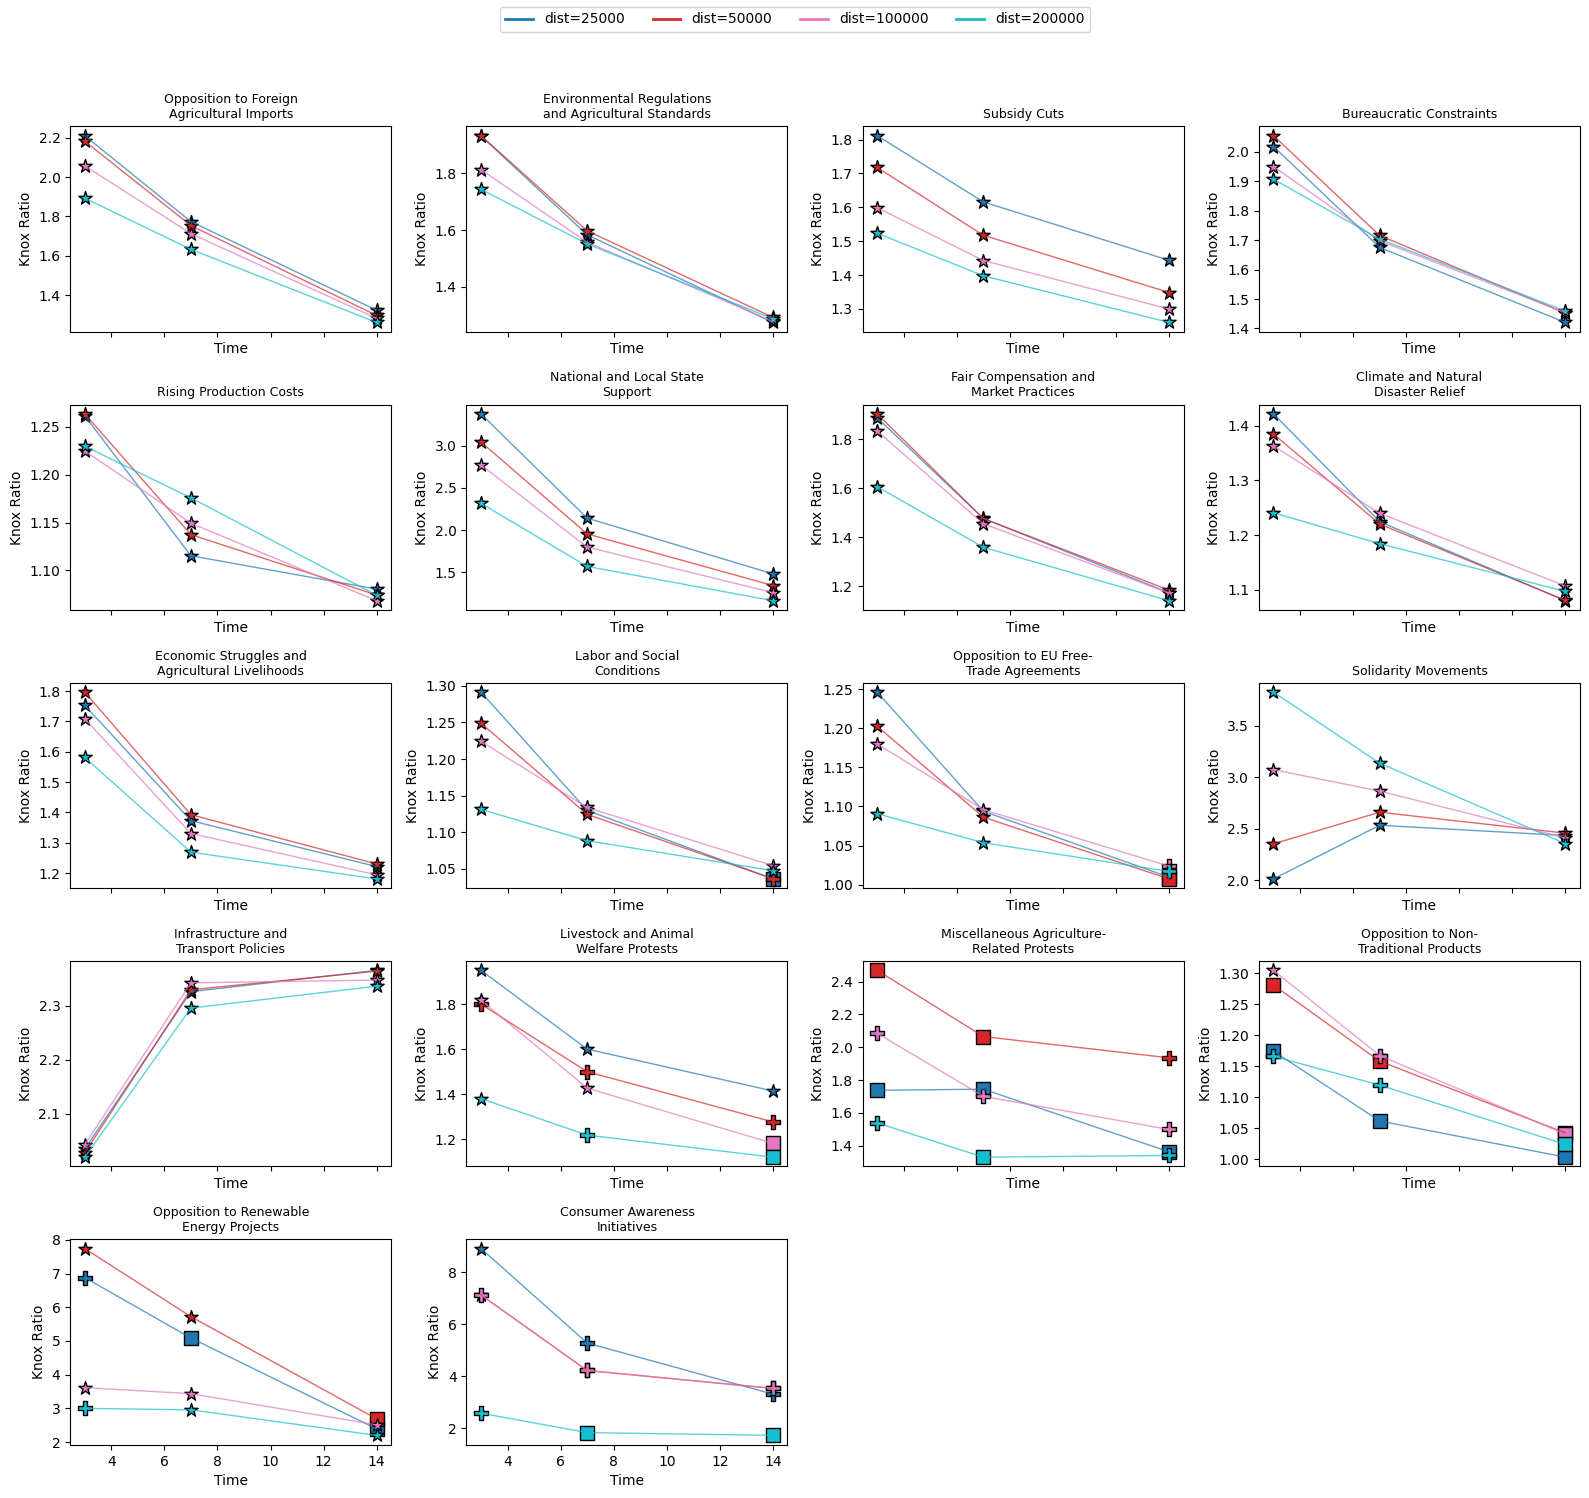

In [537]:
import matplotlib.pyplot as plt

# Get raw p-values
raw_p = df_knox1["pvalue"].values

# Adjust with Benjamini-Hochberg FDR (False Discovery Rate)
reject, p_adj, _, _ = smm.multipletests(raw_p, alpha=0.05, method='fdr_bh')

# Add back to dataframe
df_knox1["p_adj"] = p_adj

# Unique reasons
reasons = df_knox1['reason'].unique()
n_reasons = len(reasons)

# Unique distances and a color cycle
distances = sorted(df_knox1['distance'].unique())
cmap = plt.cm.get_cmap("tab10", len(distances))
color_map = {dist: cmap(i) for i, dist in enumerate(distances)}

# Set up subplots
n_cols = 4
n_rows = (n_reasons + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*3), sharex=True, sharey=False)
axes = axes.flatten()

for i, reason in enumerate(reasons):
    ax = axes[i]
    subset = df_knox1[df_knox1['reason'] == reason]

    for dist, group in subset.groupby("distance"):
        group = group.sort_values("time")  # make sure time is ordered
        color = color_map[dist]

        # Draw line connecting points for this distance
        ax.plot(group['time'], group['knox_ratio'],
                color=color, linewidth=1, alpha=0.7, label=f"dist={dist}")

        # Scatter points with marker depending on significance
        for _, row in group.iterrows():
            if row['p_adj'] > 0.05:
                marker = "s"   # square
            elif (row['p_adj'] <= 0.05) & (row['p_adj'] > 0.01):
                marker = "P"   # plus-filled
            else:  # p <= 0.01
                marker = "*"   # star

            ax.scatter(row['time'], row['knox_ratio'],
                       marker=marker, s=100, color=color, edgecolor="black")

    ax.set_title(reason, fontsize=9)
    ax.set_xlabel("Time")
    ax.set_ylabel("Knox Ratio")

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Legend (colors = distances)
handles = [plt.Line2D([0], [0], color=color_map[dist], lw=2, label=f"dist={dist}")
           for dist in distances]
fig.legend(handles=handles, loc="upper center", ncol=len(distances))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [33]:
from pointpats import SpaceTimeEvents, modified_knox, Knox, jacquez, KnoxLocal

global_knox_res_dict = {}
rows = []

dist_dict = {}  # store per res_name

for t in tqdm([3,7,14,30]):
    for i, res_name in enumerate(reason_list[1:]):
        res = results[res_name]
        
        # Choose which cross distance
        if i != 16:
            dist = res['cross_distances'][1]
        else:
            dist = res['cross_distances'][5]
    
        dist = int(dist)
        dist_dict[res_name] = dist   # store per res_name
    
        # Subset input
        input_df = gdf[gdf[res_name] == 1]
    
        s_coordinates = np.column_stack((input_df.geometry.x, input_df.geometry.y))
        t_coordinates = np.array(input_df['days_since_first']).reshape(-1, 1)
    
        # Run Knox
        result = Knox(
            s_coordinates,
            t_coordinates,
            delta=dist,
            tau=t,
            permutations=1000
        )
    
        # Save results in dictionary
        global_knox_res_dict[res_name] = result
        
    for res_name in reason_list[1:]:
        result = global_knox_res_dict[res_name]
        dist = dist_dict[res_name]  # get the correct dist for this reason
        
        knox_ratio = result.observed / result.expected
        knox_proportion = (result.observed - result.expected)/result.observed
        pvalue = result.p_sim
    
        rows.append({
            "reason": res_name,
            "knox_ratio": knox_ratio[0,0],
            "knox_proportion": knox_proportion[0,0],
            "pvalue": pvalue,
            "time": t,
            "dist": dist/1000
        })

df_knox = pd.DataFrame(rows)
  

C:\Users\cstetter\AppData\Local\Temp\ipykernel_28964\2852209377.py:44: RuntimeWarning: divide by zero encountered in divide
  knox_proportion = (result.observed - result.expected)/result.observed
100%|███████████████████████████████████████████| 4/4 [07:39<00:00, 114.77s/it]


In [34]:
import statsmodels.stats.multitest as smm

# Get raw p-values
raw_p = df_knox["pvalue"].values

# Adjust with Benjamini-Hochberg FDR (False Discovery Rate)
reject, p_adj, _, _ = smm.multipletests(raw_p, alpha=0.05, method='fdr_bh')

# Add back to dataframe
df_knox["p_adj"] = p_adj

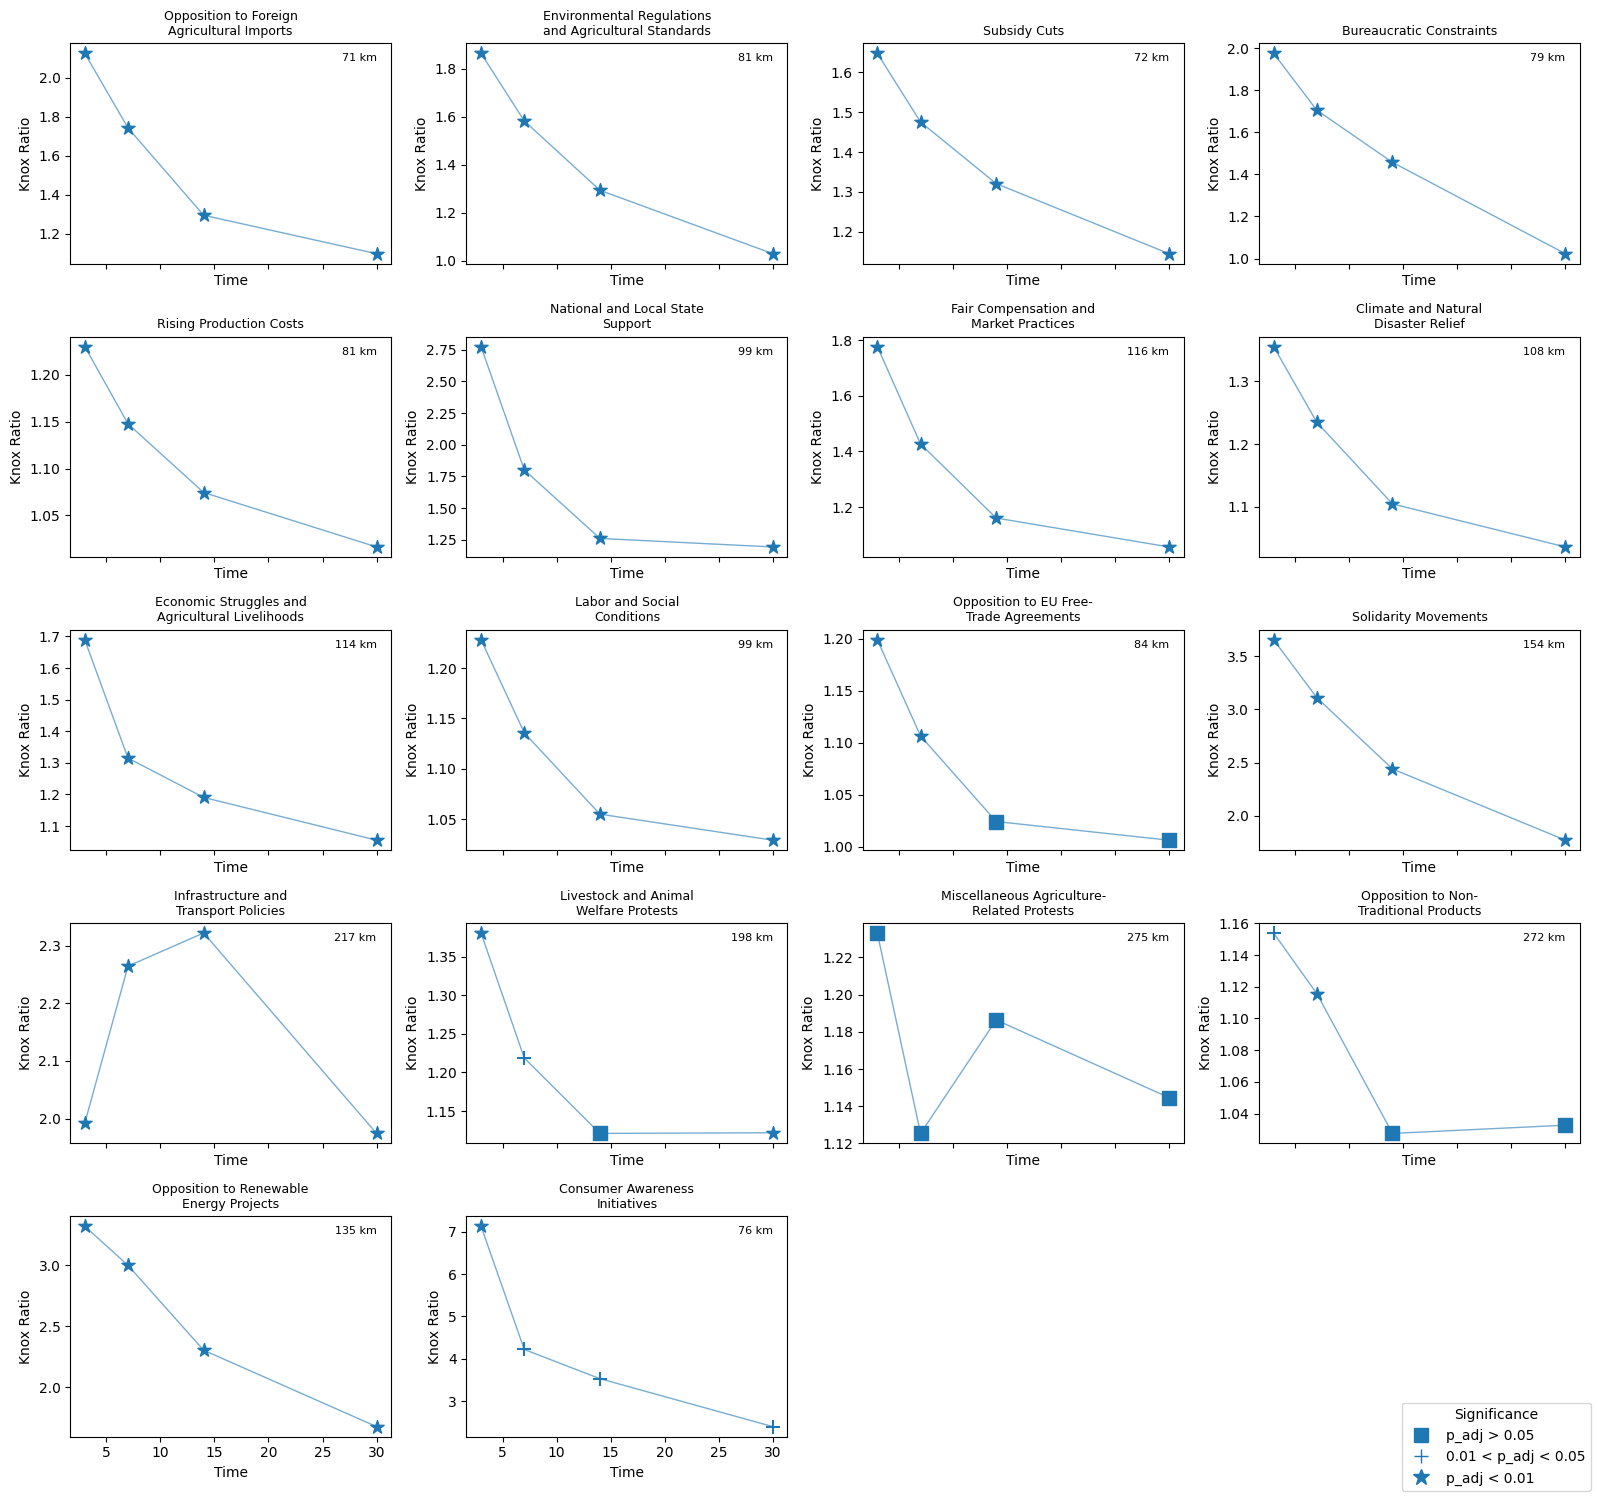

In [49]:
import matplotlib.pyplot as plt

# Unique reasons
reasons = df_knox['reason'].unique()
n_reasons = len(reasons)

# Set up subplots
n_cols = 4
n_rows = (n_reasons + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*3), sharex=True, sharey=False)
axes = axes.flatten()

for i, reason in enumerate(reasons):
    ax = axes[i]
    subset = df_knox[df_knox['reason'] == reason].sort_values("time")  # <-- sort

    # Draw line between points
    ax.plot(subset['time'], subset['knox_ratio'], color="C0", alpha=0.6, linewidth=1)

    # Scatter with different markers
    for _, row in subset.iterrows():
        if row['p_adj'] > 0.05:
            marker = "s"   # square
        elif (row['p_adj'] < 0.05) & (row['pvalue'] > 0.01):
            marker = "+"   # plus
        elif row['p_adj'] < 0.01:
            marker = "*"   # star

        ax.scatter(row['time'], row['knox_ratio'], marker=marker, s=100, color="C0")

    ax.set_title(reason, fontsize=9)
    ax.set_xlabel("Time")
    ax.set_ylabel("Knox Ratio")

    # Add text annotation for this point
    ax.text(
        row['time'],                     # x-coordinate
        np.max(subset['knox_ratio']),               # y-coordinate
        f"{row['dist']:.0f} km",        # text
        fontsize=8,
        va="top",
        ha="right"
    )

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# --- Add Legend ---
legend_elements = [
    plt.Line2D([0], [0], marker="s", color="C0", linestyle="None", markersize=10, label="p_adj > 0.05"),
    plt.Line2D([0], [0], marker="+", color="C0", linestyle="None", markersize=10, label="0.01 < p_adj < 0.05"),
    plt.Line2D([0], [0], marker="*", color="C0", linestyle="None", markersize=12, label="p_adj < 0.01"),
]

fig.legend(handles=legend_elements, loc="lower right", title="Significance", fontsize=10)

plt.tight_layout()
plt.show()


# Local Knox

In [28]:
import geopandas as gpd
from shapely.geometry import Polygon


# Load europe
geofile = "../data/gadm_410-levels.gpkg"

print(
    gpd.list_layers(geofile)
     )

# Make polygon from bbox coordinates https://stackoverflow.com/a/68741143/18253502
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

# # Coords covering Europe & Russia made with http://bboxfinder.com
bbox = make_bbox(-11,35,30.292969,74.543330)

# # STEP 2 #
# # Convert to gdf
bbox_gdf = gpd.GeoDataFrame(index=[0], crs='WGS1984', geometry = [bbox])
europe_countries = ['ALB', 'AND', 'AUT', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 
                    'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'XKX', 
                    'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 
                    'NOR', 'POL', 'PRT', 'ROU', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 
                    'CHE', 'UKR', 'GBR', 'VAT']

world0 = gpd.read_file(geofile, layer='ADM_0')
europe0 = world0.overlay(bbox_gdf, how="intersection")
europe0 = europe0[europe0["GID_0"].isin(europe_countries)]
europe0 = europe0.rename(columns={"GID_0": "id"})
europe0 = europe0.to_crs(epsg=3035)


del world0

# world1 = gpd.read_file(geofile, layer='ADM_1')
# europe1 = world1.overlay(bbox_gdf, how="intersection")
# europe1 = europe1[europe1["GID_0"].isin(europe_countries)]
# europe1 = europe1.rename(columns={"GID_1": "id"})
# europe1 = europe1.to_crs(epsg=3035)

# del world1

# world2 = gpd.read_file(geofile, layer='ADM_2')
# europe2 = world2.overlay(bbox_gdf, how="intersection")
# europe2 = europe2[europe2["GID_0"].isin(europe_countries)]
# europe2 = europe2.rename(columns={"GID_2": "id"})
# europe2 = europe2.to_crs(epsg=3035)

# del world2

    name geometry_type
0  ADM_0  MultiPolygon
1  ADM_1  MultiPolygon
2  ADM_2  MultiPolygon
3  ADM_3  MultiPolygon
4  ADM_4  MultiPolygon
5  ADM_5  MultiPolygon


In [7]:
import pickle

# Read the data from the file
with open("global_knox_results.pkl", "rb") as f:
    # Load the object (it will be assigned to the 'loaded_results' variable)
    results = pickle.load(f)

In [8]:
from pointpats import SpaceTimeEvents, modified_knox, Knox, jacquez, KnoxLocal

crs_meters = 'EPSG3035'


In [ ]:
results

In [22]:
from tqdm import tqdm
from pointpats import KnoxLocal

local_knox_res_dict = {}
rows = []

for i, res_name in enumerate(reason_list[1:]):
    res = results[res_name]
    
    # Choose which cross distance
    if i != 17:
        dist = res['cross_distances'][1]
    else:
        dist = res['cross_distances'][5]

    # Subset input
    input_df = gdf[gdf[res_name] == 1]

    s_coordinates = np.column_stack((input_df.geometry.x, input_df.geometry.y))
    t_coordinates = np.array(input_df['days_since_first']).reshape(-1, 1)

    # Run modified_knox
    result = KnoxLocal(
        s_coordinates,
        t_coordinates,
        delta=dist,
        tau=7,
        permutations=1000,
        crs= 'EPSG:3035',
        ids = np.array(input_df.index)
    )

    # Save results in dictionary with a descriptive key
    key = f"{res_name}"
    local_knox_res_dict[key] = result

# for res_name in reason_list[1:]:
#     result = global_knox_res_dict[res_name]
    
#     knox_ratio = result.observed / result.expected
#     pvalue = result.p_sim

#     rows.append({
#         "reason": res_name,
#         "knox_ratio": knox_ratio[0,0],
#         "pvalue": pvalue,
#         "time": t,
#         "distance": s
#     })

# df_knox1 = pd.DataFrame(rows)    

In [23]:
import pickle

with open("local_knox_results.pkl", "wb") as f:
    pickle.dump(local_knox_res_dict, f)

In [10]:
import pickle

# Read the data from the file
with open("local_knox_results.pkl", "rb") as f:
    # Load the object (it will be assigned to the 'loaded_results' variable)
    local_knox_res_dict = pickle.load(f)

In [52]:
hotspot_gdf = pd.concat(
    [
        local_knox_res_dict[reason].hotspots().assign(reason=reason)
        for reason in reason_list[1:]
    ],
    ignore_index=True
)
hotspot_gdf = hotspot_gdf.rename(columns={'focal_time': 'days_since_first'})

In [ ]:
id_cols = [
    'event_id_cnty', 'event_date', 'year', 'time_precision',
    'disorder_type', 'event_type', 'sub_event_type', 'actor1',
    'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
    'interaction', 'civilian_targeting', 'iso', 'region', 'country',
    'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
    'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
    'tags', 'timestamp', 'population_best', 'month', 'description',
    'geometry', 'month_year', 'days_since_first'
]

gdf_long = gdf.melt(
    id_vars=id_cols,
    value_vars=reason_list[1:],
    var_name='reason',
    value_name='value'
)

gdf_long = gpd.GeoDataFrame(gdf_long, geometry='geometry', crs=gdf.crs)

# Optional: drop rows with NaN or 0 values in 'value'
gdf_long = gdf_long[gdf_long['value'].notna() & (gdf_long['value'] != 0)]

In [53]:
knox_gdf = gdf_long.merge(
    hotspot_gdf,
    on=["reason", "geometry", "days_since_first"],   # if hotspot_gdf has a focal_time column
    how="left"
)



In [11]:
subset_gdf = gdf[gdf['Opposition to Foreign\nAgricultural Imports'] == 1]
hotspot_gdf = local_knox_res_dict['Opposition to Foreign\nAgricultural Imports'].hotspots().sort_values("cluster")

hotspot_gdf = hotspot_gdf.rename(columns={'focal_time': 'days_since_first'})

In [16]:
knox_gdf = subset_gdf.merge(
    hotspot_gdf,
    on=["geometry", "days_since_first"],   # if hotspot_gdf has a focal_time column
    how="left"
)

# Make sure event_date is datetime
knox_gdf['event_date'] = pd.to_datetime(knox_gdf['event_date'])

# Compute cluster-wise start and end dates
knox_gdf['cluster_start'] = knox_gdf.groupby('cluster')['event_date'].transform('min')
knox_gdf['cluster_end']   = knox_gdf.groupby('cluster')['event_date'].transform('max')

knox_gdf['cluster_timespan'] = (
    knox_gdf['cluster_start'].dt.strftime('%Y-%m-%d')
    + " → " +
    knox_gdf['cluster_end'].dt.strftime('%Y-%m-%d')
)

knox_gdf['cluster_days'] = (
    knox_gdf['cluster_end'] - knox_gdf['cluster_start']
).dt.days

C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of

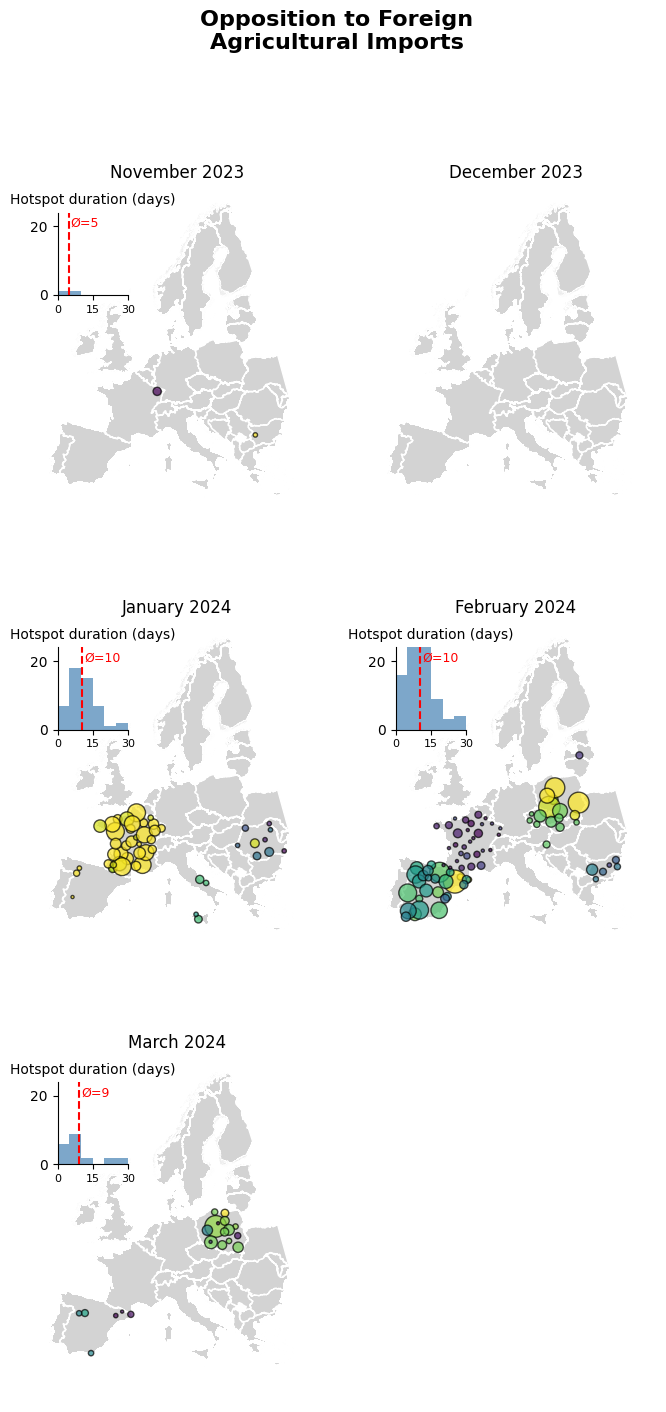

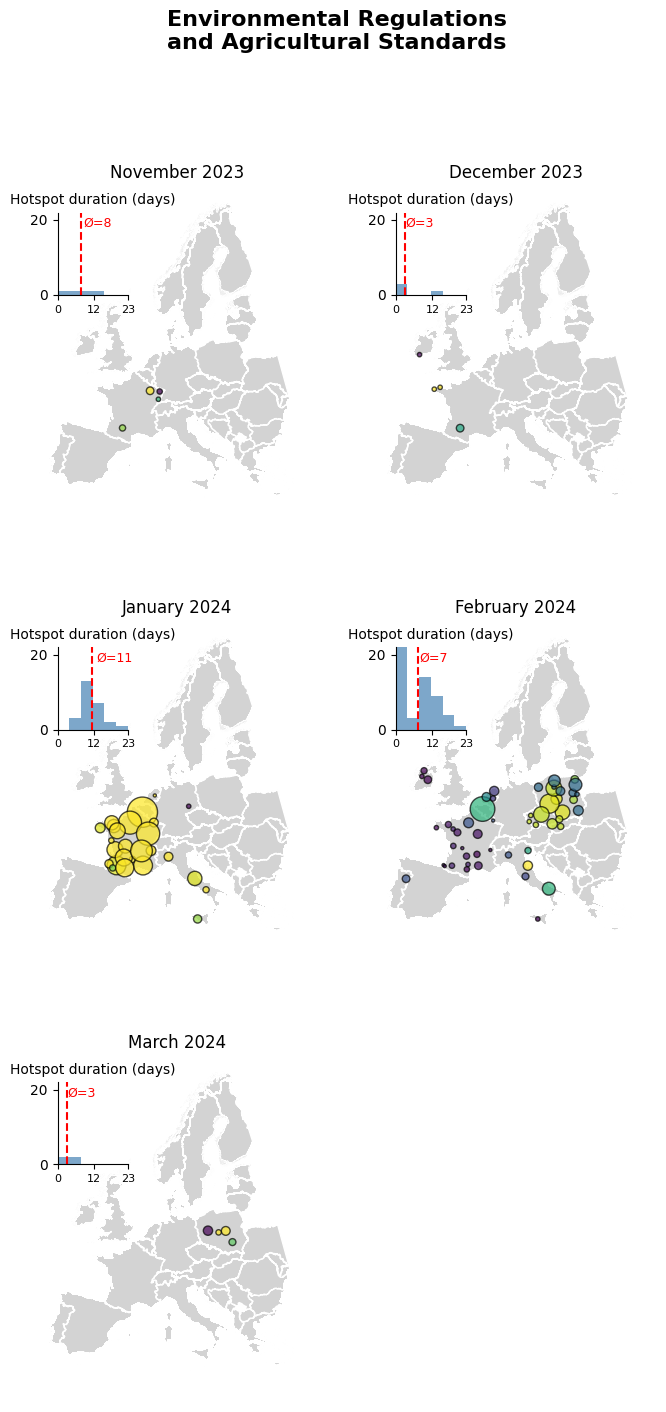

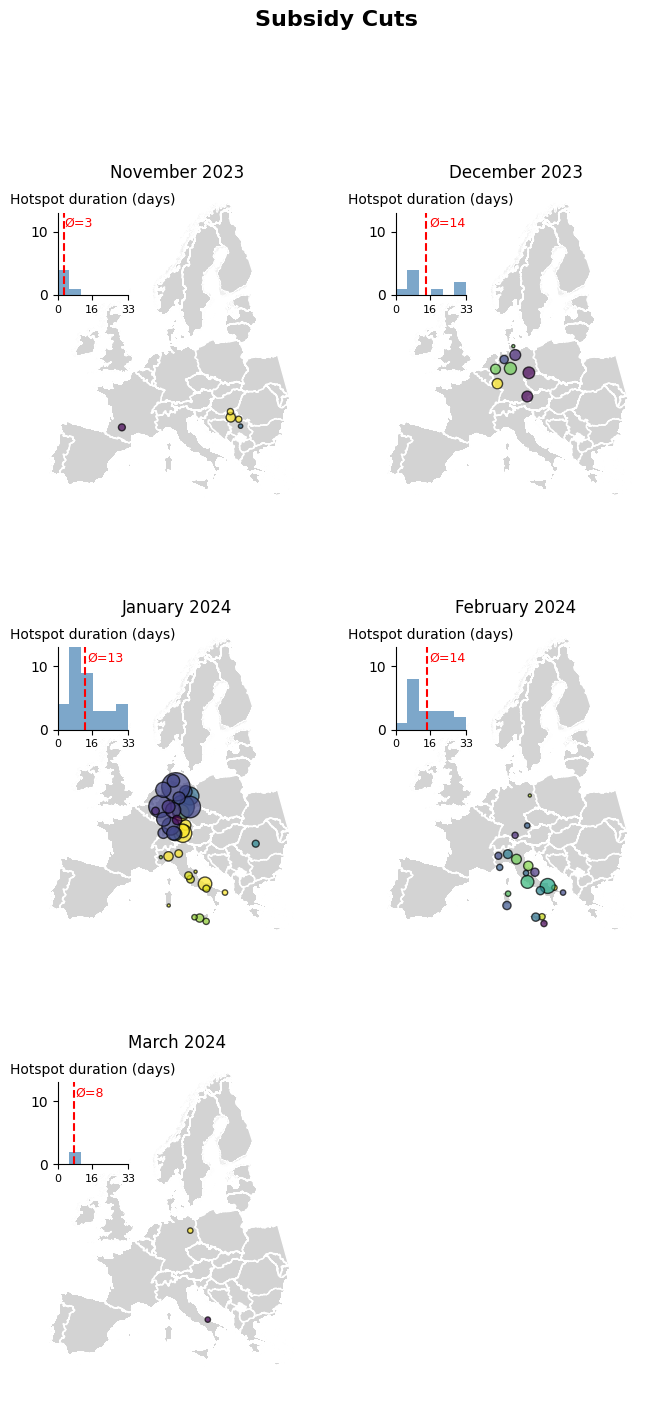

In [66]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint
from matplotlib.lines import Line2D
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm

for i, reason in tqdm(enumerate(reason_list[1:4])):
    knox_gdf_sub = knox_gdf[knox_gdf["reason"]==reason]
    
    # Make sure event_date is datetime
    knox_gdf_sub['event_date'] = pd.to_datetime(knox_gdf_sub['event_date'])
    
    # Compute cluster-wise start and end dates
    knox_gdf_sub['cluster_start'] = knox_gdf_sub.groupby('cluster')['event_date'].transform('min')
    knox_gdf_sub['cluster_end']   = knox_gdf_sub.groupby('cluster')['event_date'].transform('max')
    
    knox_gdf_sub['cluster_timespan'] = (
        knox_gdf_sub['cluster_start'].dt.strftime('%Y-%m-%d')
        + " → " +
        knox_gdf_sub['cluster_end'].dt.strftime('%Y-%m-%d')
    )
    
    knox_gdf_sub['cluster_days'] = (
        knox_gdf_sub['cluster_end'] - knox_gdf_sub['cluster_start']
    ).dt.days
    
    
    
    months = ['November 2023', 'December 2023', 'January 2024',
              'February 2024', 'March 2024']
    
    cmap = plt.cm.viridis
    
    # fig, axes = plt.subplots(2, 3, figsize=(14, 10), sharex=True, sharey=True)
    # axes = axes.flatten()
    # plot_positions = [0, 1, 3, 4, 5]  # maps go here
    # legend_pos = 2  # empty subplot for legends
    
    
    # fig, axes = plt.subplots(2, 3, figsize=(14, 10), sharex=True, sharey=True)
    fig, axes = plt.subplots(3, 2, figsize=(8, 16), sharex=True, sharey=True)
    
    
    
    # Add a figure-level title
    fig.suptitle(reason, fontsize=16, fontweight='bold')
    
    axes = axes.flatten()
    plot_positions = [0, 1, 2, 3, 4]  # maps go here
    legend_pos = 5  # empty subplot for legends
    
    # --- Precompute global histogram limits and max y ---
    all_cluster_days = []
    for month in months:
        gdf_month = knox_gdf_sub[knox_gdf_sub['month_year'] == month]
        if gdf_month.empty:
            continue
        cluster_days_per_cluster = [group['cluster_days'].iloc[0] for _, group in gdf_month.groupby('cluster')]
        all_cluster_days.extend(cluster_days_per_cluster)
    
    if all_cluster_days:
        x_min = min(all_cluster_days)
        x_max = max(all_cluster_days)
    else:
        x_min, x_max = 0, 1  # fallback
    
    # Precompute max histogram height
    max_count = 0
    hist_data_dict = {}
    for month in months:
        gdf_month = knox_gdf_sub[knox_gdf_sub['month_year'] == month]
        if gdf_month.empty:
            hist_data_dict[month] = []
            continue
        cluster_days_per_cluster = [group['cluster_days'].iloc[0] for _, group in gdf_month.groupby('cluster')]
        hist_data_dict[month] = cluster_days_per_cluster
        if cluster_days_per_cluster:
            counts, _ = np.histogram(cluster_days_per_cluster, bins=6, range=(x_min, x_max))
            max_count = max(max_count, counts.max())
    
    for month, pos in zip(months, plot_positions):
        gdf_month = knox_gdf_sub[knox_gdf_sub['month_year'] == month]
    
        europe0.plot(ax=axes[pos], color="lightgrey", edgecolor="white")
        axes[pos].set_title(month)
        
        if gdf_month.empty:
            axes[pos].axis('off')
            continue
        
        # --- Aggregate clusters ---
        cluster_points_list = []
        for cluster_id, group in gdf_month.groupby('cluster'):
            count = len(group)
            multipoint = MultiPoint(group.geometry.tolist())
            centroid = multipoint.centroid
            cluster_start = group['days_since_first'].iloc[0]
            cluster_days = group['cluster_days'].iloc[0]  # one value per cluster
            cluster_points_list.append({
                'cluster': cluster_id,
                'count': count,
                'cluster_start': cluster_start,
                'cluster_days': cluster_days,
                'geometry': centroid
            })
    
        if not cluster_points_list:
            axes[pos].axis('off')
            continue
    
        cluster_points = gpd.GeoDataFrame(cluster_points_list, crs=gdf_month.crs)
        
        # Normalize color scale for this month
        norm = mpl.colors.Normalize(
            vmin=cluster_points['cluster_start'].min(),
            vmax=cluster_points['cluster_start'].max()
        )
        cluster_points['color_val'] = cluster_points['cluster_start']
        
        # --- Plot cluster centroids ---
        cluster_points.plot(
            ax=axes[pos],
            column='color_val',
            cmap=cmap,
            edgecolor="black",
            markersize=cluster_points['count'] * 5,
            legend=False,
            alpha=0.7,
            norm=norm
        )
        
        axes[pos].axis('off')
        
        # --- Add inset histogram (upper left) ---
        ax_inset = inset_axes(
            axes[pos],
            width="100%",      # width of inset
            height="100%",     # height of inset
            bbox_to_anchor=(0.05, 0.65, 0.25, 0.25),  # x0, y0, width, height in axes fraction
            bbox_transform=axes[pos].transAxes,
            loc='lower left'  # loc is needed but ignored when bbox_to_anchor is set
        )
    
        all_days = hist_data_dict[month]
        ax_inset.hist(all_days, bins=6, color='steelblue', alpha=0.7, range=(x_min, x_max))
        ax_inset.set_ylim(0, max_count)
        ax_inset.set_xlim(x_min, x_max)
        
        # Spine adjustments
        ax_inset.spines['top'].set_visible(False)
        ax_inset.spines['right'].set_visible(False)
        ax_inset.yaxis.set_visible(True)  # hide y-axis entirely
        
        # Tick adjustments
        if all_days:
            xticks = np.linspace(x_min, x_max, 3)
            xticks = np.round(xticks).astype(int)  # integer ticks
            ax_inset.set_xticks(xticks)
        ax_inset.tick_params(axis='x', labelsize=8)
        
        # Add vertical red mean line with Ø annotation
        if all_days:
            mean_val = np.mean(all_days)
            ax_inset.axvline(mean_val, color='red', linestyle='--', linewidth=1.5)
            ax_inset.text(
                mean_val*1.1, max_count*0.95, f"Ø={int(round(mean_val))}",
                color='red', fontsize=9, ha='left', va='top'
            )
        
        ax_inset.set_title('Hotspot duration (days)', fontsize=10, ha="center")
    
    # --- Build legends in subplot[2] ---
    axes[legend_pos].axis('off')
    
    # Size legend (top)
    # size_levels = [5, 15, 30]
    # size_handles = [
    #     Line2D([0], [0], marker='o', color='w',
    #            markerfacecolor='grey', alpha=0.6,
    #            markersize=(s*5)**0.5,
    #            label=f"{s} events")
    #     for s in size_levels
    # ]
    
    # legend1 = axes[legend_pos].legend(
    #     handles=size_handles, title="Cluster size",
    #     loc="upper center", 
    #     bbox_to_anchor=(0.5, 0.42),
    #     fontsize=12,
    #     ncol=len(size_handles),
    #     frameon=False
    # )
    # legend1.get_title().set_fontsize(13)
    # axes[legend_pos].add_artist(legend1)
    
    # # Slim, short horizontal colorbar (bottom)
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm._A = []
    # cax = inset_axes(
    #     axes[legend_pos],
    #     width="63%",
    #     height="3%",
    #     loc="center"
    # )
    # cbar = fig.colorbar(sm, cax=cax, orientation="horizontal")
    # cbar.set_ticks([norm.vmin, norm.vmax])
    # cbar.set_ticklabels(["1st", "29th/30th/31st"])
    # tick_labels = cbar.ax.get_xticklabels()
    # tick_labels[0].set_ha("left")
    # tick_labels[-1].set_ha("right")
    
    # cbar.ax.tick_params(length=0, labelsize=11)
    # cbar.set_label("Hotspot starting date", fontsize=13)
    # cbar.ax.xaxis.set_label_position("top")
    plt.savefig(f"../img/hs_{i}.png", dpi=600, bbox_inches="tight")

# --- Create a standalone legend figure ---
legend_fig, legend_ax = plt.subplots(figsize=(5, 2))
legend_ax.axis('off')  # Hide axes

# --- Rebuild size legend ---
size_levels = [5, 15, 30]
size_handles = [
    Line2D(
        [0], [0], marker='o', color='w',
        markerfacecolor='grey', alpha=0.6,
        markersize=(s*5)**0.5,
        label=f"{s} events"
    )
    for s in size_levels
]

legend1 = legend_ax.legend(
    handles=size_handles, title="Cluster size",
    loc="center", ncol=len(size_handles),
    frameon=False, fontsize=12
)
legend1.get_title().set_fontsize(13)

# --- Add colorbar below size legend ---
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []

cax = inset_axes(
    legend_ax,
    width="70%",  # width relative to axes
    height="20%",  # height relative to axes
    loc="lower center",
    bbox_to_anchor=(0.15, -0.3, 0.7, 1),
    bbox_transform=legend_ax.transAxes,
    borderpad=0
)

cbar = legend_fig.colorbar(sm, cax=cax, orientation="horizontal")
cbar.set_ticks([norm.vmin, norm.vmax])
cbar.set_ticklabels(["1st", "29th/30th/31st"])
cbar.ax.tick_params(length=0, labelsize=11)
cbar.set_label("Hotspot starting date", fontsize=13)
cbar.ax.xaxis.set_label_position("top")

# --- Save as separate figure ---
legend_fig.savefig("../img/hs_legend.png", dpi=600, bbox_inches="tight")
plt.close(legend_fig)


In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
local_knox.hotspots().sort_values("cluster")

C:\Users\cstetter\AppData\Local\Temp\ipykernel_11364\3941538627.py:11: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = subset.unary_union.centroid   # centroid of all points in cluster


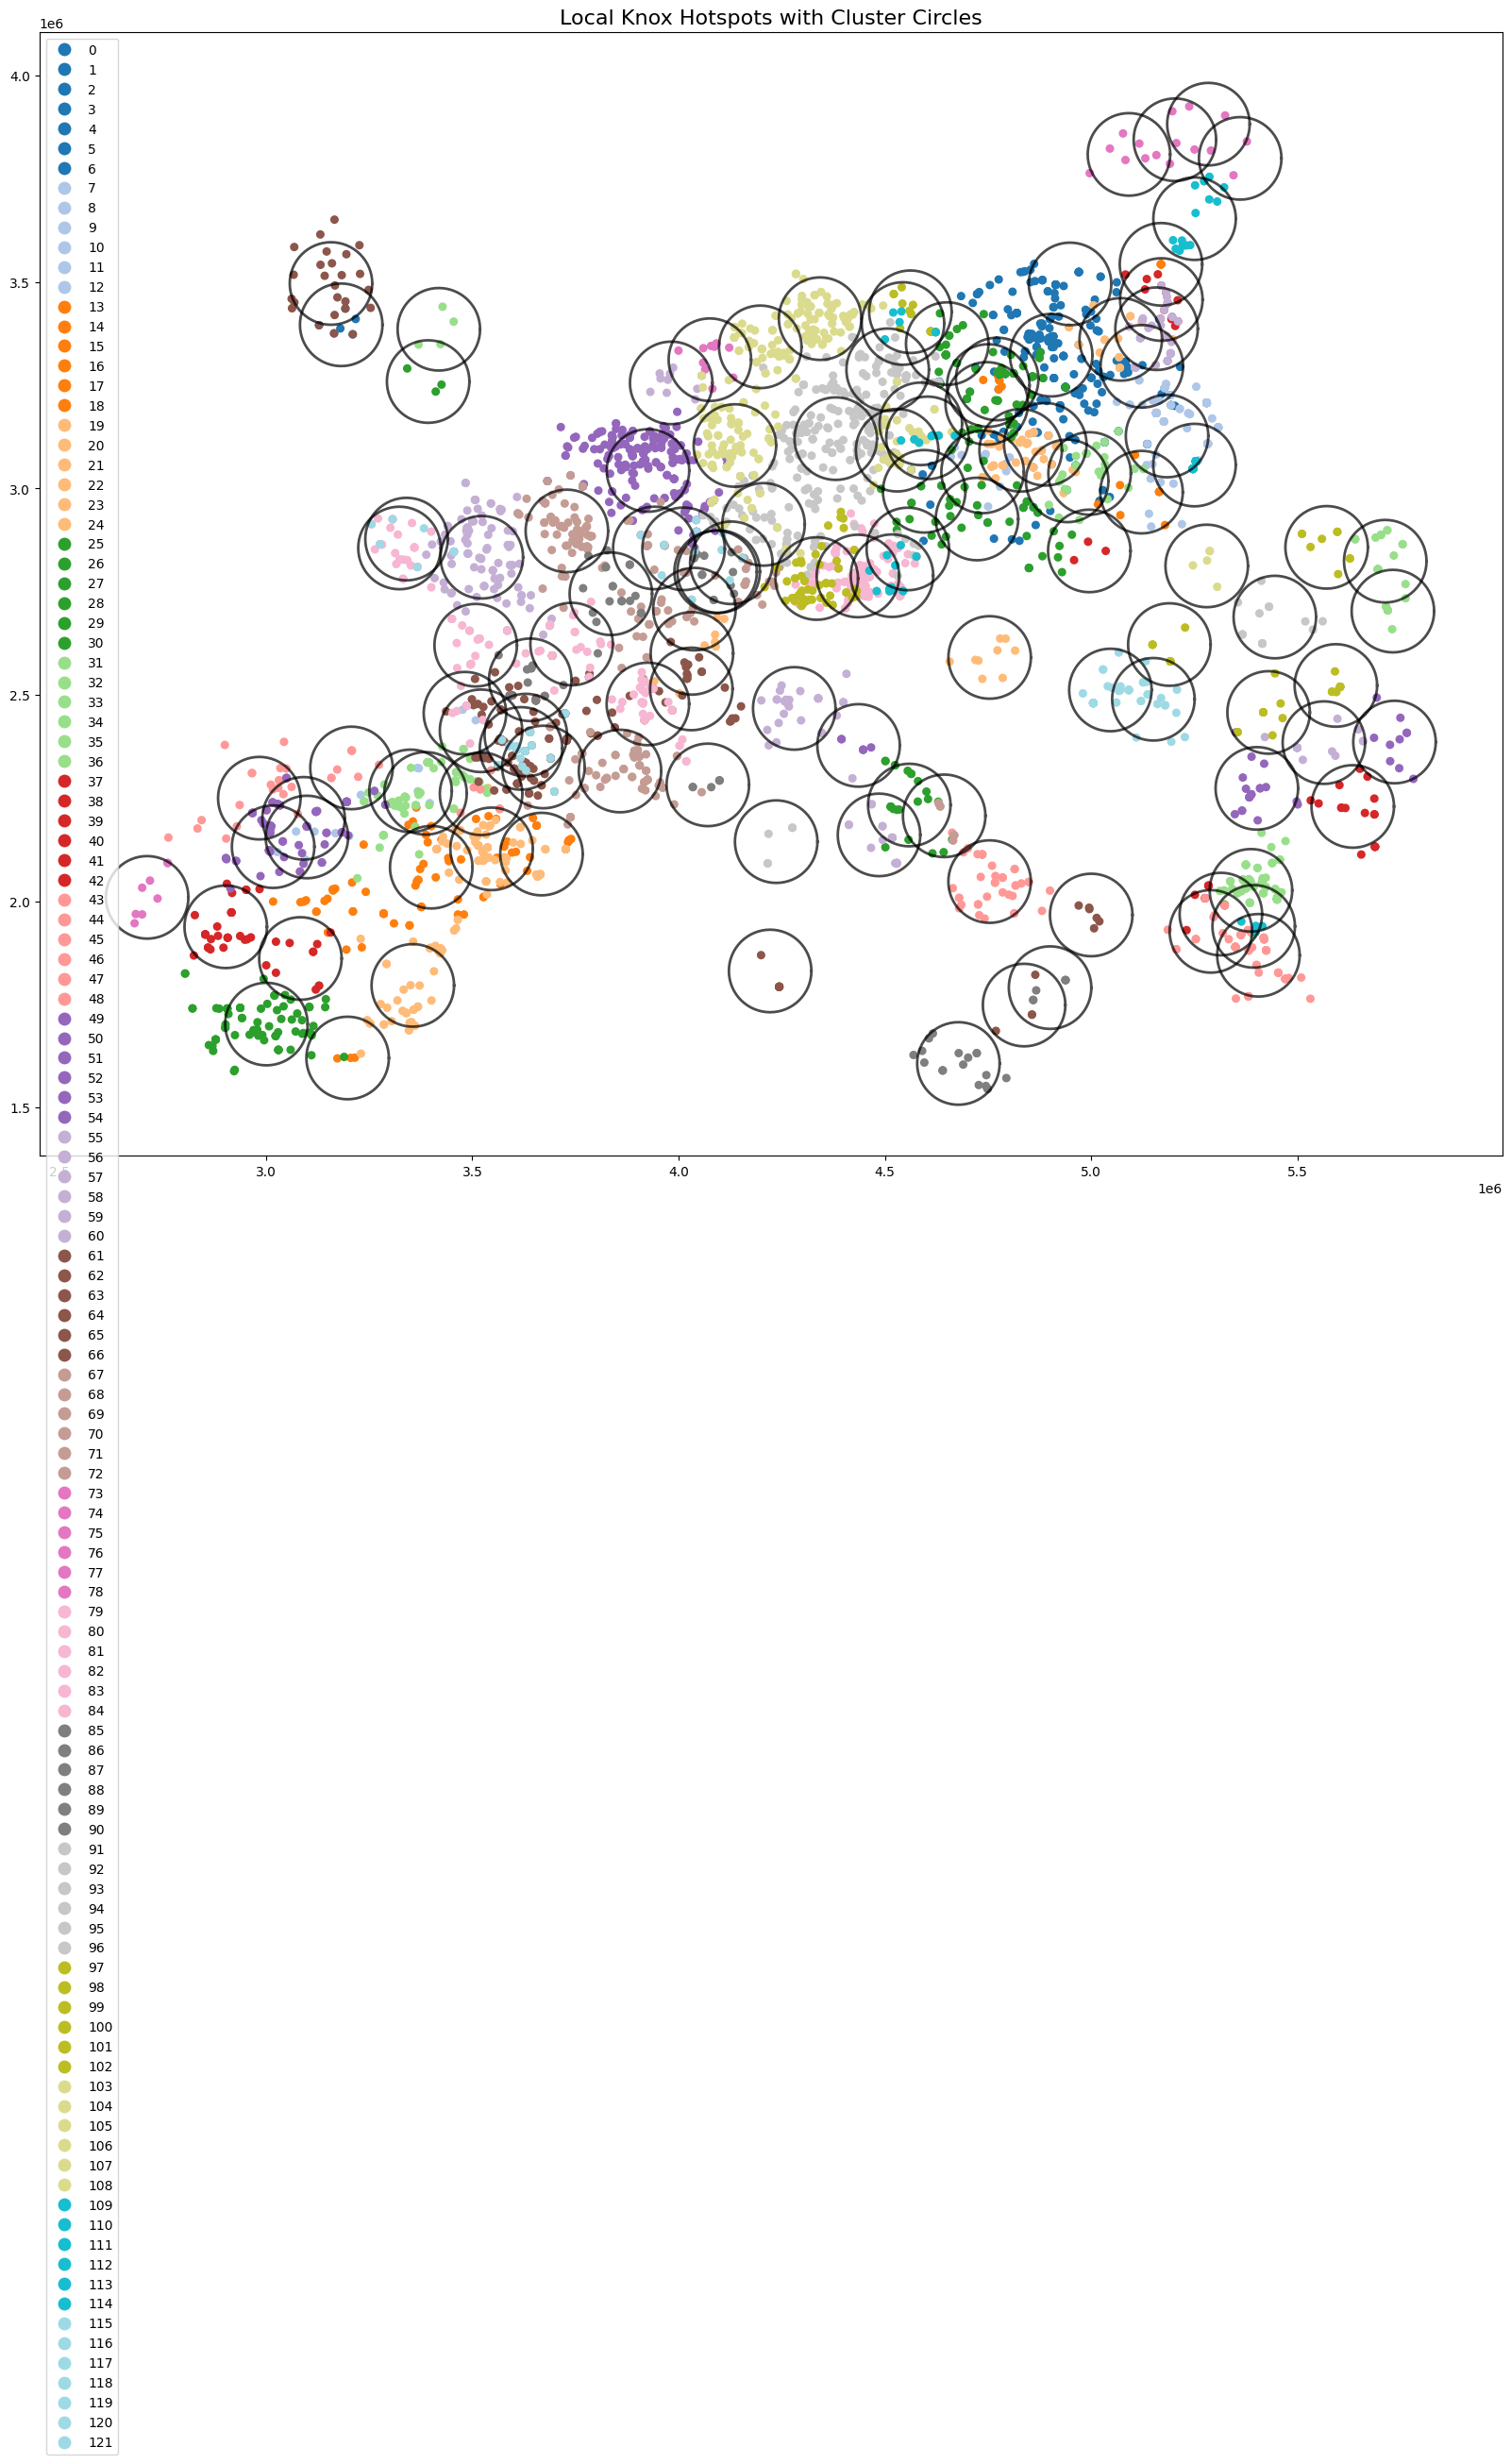

In [70]:
import matplotlib.pyplot as plt

# Get hotspots sorted by cluster
gd = local_knox.hotspots().sort_values("cluster")

# Create a big figure
fig, ax = plt.subplots(figsize=(20, 20))

# For each cluster, compute centroid and draw circle
for cluster_id, subset in gd.groupby("cluster"):
    centroid = subset.unary_union.centroid   # centroid of all points in cluster
    circle = centroid.buffer(100000)           # adjust buffer radius to your CRS (degrees or meters)
    ax.plot(*circle.exterior.xy, color="black", linewidth=2, alpha=0.7)

gd.plot(column="cluster", categorical=True, legend=True, cmap="tab20", ax=ax, markersize=30)


plt.title("Local Knox Hotspots with Cluster Circles", fontsize=16)
plt.show()

# Polygon and Moran stuff

<Axes: >

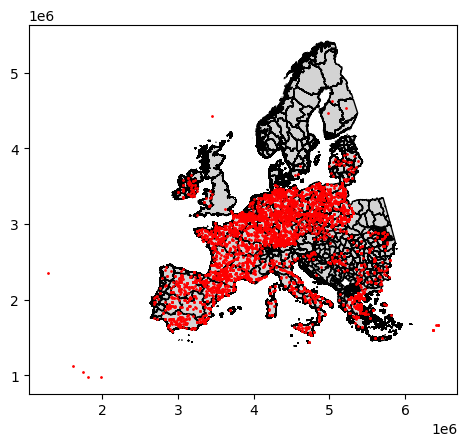

In [7]:
# Plot the countries as the base layer
ax = europe1.plot(color='lightgray', edgecolor='black')

# Overlay the cities on the same axes
point_df.plot(ax=ax, marker='o', color='red', markersize=1)

In [8]:
df_results_full = pd.concat([df_main, df_results], axis=1)

gdf = gpd.GeoDataFrame(
    df_results_full, geometry=gpd.points_from_xy(df_results_full.longitude, df_results_full.latitude), crs="EPSG:4326"
)

# Remove points outside bounding box
mask = gdf.geometry.intersects(bbox_gdf.unary_union)  # Create mask
gdf = gdf[mask]  # Filter GeoDataFrame
gdf = gdf.to_crs(epsg=3035)

# Perform a spatial join to keep only points within countries
gdf0 = gpd.sjoin(gdf, europe0, how='inner', predicate='intersects')
gdf0["All protests"] = 1
# Optionally, drop the index_right column added by sjoin
gdf0 = gdf0.drop(columns=['index_right'])
gdf0 = gdf0.rename(columns={"GID_0": "id"})


# Perform a spatial join to keep only points within countries
gdf1 = gpd.sjoin(gdf, europe1, how='inner', predicate='intersects')
gdf1["All protests"] = 1
# Optionally, drop the index_right column added by sjoin
gdf1 = gdf1.drop(columns=['index_right'])
gdf1 = gdf1.rename(columns={"GID_1": "id"})


# Perform a spatial join to keep only points within countries
gdf2 = gpd.sjoin(gdf, europe2, how='inner', predicate='intersects')
gdf2["All protests"] = 1
# Optionally, drop the index_right column added by sjoin
gdf2 = gdf2.drop(columns=['index_right'])
gdf2 = gdf2.rename(columns={"GID_2": "id"})


C:\Users\cstetter\AppData\Local\Temp\ipykernel_5956\1090358549.py:8: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mask = gdf.geometry.intersects(bbox_gdf.unary_union)  # Create mask


In [9]:
# import geopandas as gpd

# # Path to your shapefile (adjust if needed)

# geofile = "../data/EEA_50km_grid_v2024.gpkg"
# print(gpd.list_layers(geofile))
# #ref_grid50 = gpd.read_file(geofile)

# # Load with geopandas
# ref_grid100 = gpd.read_file("zip://../data/eea_v_3035_100_km_eea-ref-grid-europe_p_2011_v01_r00.zip!eea_v_3035_100_km_eea-ref-grid-europe_p_2011_v01_r00/Grid_ETRS89-LAEA_100K.shp"
# )

# # Inspect
# print(ref_grid100.head())
# print(ref_grid100.crs)   # check coordinate reference system
# ref_grid100.plot(
#     edgecolor="black",   # border color
#     facecolor="none",    # keep grid cells transparent
#     linewidth=0.2        # thin borders
# )

# europe3035 = europe0.to_crs(epsg=3035)

# # Clip the grid with the Europe polygon
# masked_grid = gpd.clip(ref_grid100, europe3035)

# # Inspect results
# print(masked_grid.shape)

In [10]:
# masked_grid.to_file("../data/masked_grid.gpkg", layer="masked_grid100", driver="GPKG")

# masked_grid.plot(
#     edgecolor="black",   # border color
#     facecolor="none",    # keep grid cells transparent
#     linewidth=0.2        # thin borders
# )

In [11]:
masked_grid100 = gpd.read_file("../data/masked_grid.gpkg", layer='masked_grid100')
masked_grid50 = gpd.read_file("../data/masked_grid.gpkg", layer='masked_grid50')

gdf3035 = gdf.to_crs(epsg=3035)
europe3035 = europe0.to_crs(epsg=3035)

masked_grid100 = masked_grid100.rename(columns={"CellCode": "id"})
masked_grid50 = masked_grid50.rename(columns={"cellcode": "id"})

gdf50 = gpd.sjoin(gdf3035, masked_grid50, how='inner', predicate='intersects')
gdf50["All protests"] = 1
gdf50 = gdf50.rename(columns={"cellcode": "id"})


gdf100 = gpd.sjoin(gdf3035, masked_grid100, how='inner', predicate='intersects')
gdf100["All protests"] = 1
gdf100 = gdf100.rename(columns={"CellCode": "id"})


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
t = gdf100.groupby('id')['Climate and Natural\nDisaster Relief'].sum().reset_index(name='point_count')

grid_with_counts = masked_grid100.merge(t, on="id", how="left").fillna(0)


# Plot choropleth
fig, ax = plt.subplots(figsize=(10, 8))
grid_with_counts.plot(column='point_count',
              cmap='OrRd',
              legend=True,
              linewidth=.1,
              edgecolor='black',
              ax=ax)

europe3035.boundary.plot(
    ax=ax,
    edgecolor='black',
    linewidth=1
)

plt.title("Protest Counts per Cell", fontsize=14)
plt.show()

In [ ]:
import numpy as np
from libpysal.weights import Queen, Rook, KNN
from esda import Moran
import pandas as pd
from tqdm import tqdm

def _bh_adjust(pvals):
    """Benjamini-Hochberg FDR adjustment (returns adjusted p-values in original order)."""
    p = np.asarray(pvals)
    m = len(p)
    order = np.argsort(p)
    ranks = np.arange(1, m+1)
    p_sorted = p[order]
    adj_sorted = p_sorted * m / ranks
    # cumulative minimum from largest to smallest to enforce monotonicity
    adj_sorted = np.minimum.accumulate(adj_sorted[::-1])[::-1]
    adj_sorted = np.minimum(adj_sorted, 1.0)
    # put back in original order
    adj = np.empty_like(adj_sorted)
    adj[order] = adj_sorted
    return adj

def compute_moran_adjusted(europe_gdf, gdf, reason_list, alpha=0.05, weight_type="queen", k=8):
    """Compute Moran's I statistics for reasons grouped by gid_col and return adjusted p-values.
    
    Returns DataFrame with:
      - reason, moran_i, p_sim (permutation p), p_norm (normal approx)
      - p_bh (Benjamini-Hochberg)
      - sig_bonf, sig_bh (booleans at given alpha)
    """
    results = []
    
     # Choose weight structure
    if weight_type.lower() == "queen":
        w = Queen.from_dataframe(europe_gdf, use_index=True)
    elif weight_type.lower() == "rook":
        w = Rook.from_dataframe(europe_gdf, use_index=True)
    elif weight_type.lower() == "knn":
        w = KNN.from_dataframe(europe_gdf, k=k, use_index=True)
    else:
        raise ValueError("weight_type must be 'queen', 'rook', or 'knn'")
        
    
    for reason in tqdm(reason_list):
        point_counts = gdf.groupby('id')[reason].sum().reset_index(name='point_count')
        final_gdf = europe_gdf.merge(point_counts, on='id', how='left').fillna({'point_count': 0})
        
        moran = Moran(final_gdf["point_count"], w)
        
        results.append({
            'reason': reason,
            'moran_i': moran.I,
            'p_sim': moran.p_sim,   # permutation p-value
            'p_norm': moran.p_norm,  # normal-approx p-value
            'z_sim': moran.z_sim
        })
    
    df = pd.DataFrame(results)
    m = 19*15
    # Bonferroni
    # df['p_bonf'] = np.minimum(df['p_sim'] * m, 1.0)
    # Benjamini-Hochberg FDR
    df['p_bh'] = _bh_adjust(df['p_sim'].values)
    # significance flags at specified alpha
    # df['sig_bonf'] = df['p_bonf'] < alpha
    df['sig_bh']   = df['p_bh'] < alpha
    
    # For convenience: sort by raw p_sim
    return df

# df_final0 = compute_moran_adjusted(europe0, gdf0, reason_list)
# df_final1 = compute_moran_adjusted(europe1, gdf1, reason_list)
# df_final2 = compute_moran_adjusted(europe2, gdf2, reason_list)
# df_final50 = compute_moran_adjusted(masked_grid50, gdf50, reason_list)
# df_final100 = compute_moran_adjusted(masked_grid100, gdf100, reason_list)


results = []
weight_types = ["queen", "rook", "knn"]

for dataset_label, (europe_gdf, gdf) in {
    "df_final0": (europe0, gdf0),
    "df_final1": (europe1, gdf1),
    "df_final2": (europe2, gdf2),
    "df_final50": (masked_grid50, gdf50),
    "df_final100": (masked_grid100, gdf100),
}.items():
    
    for wtype in weight_types:
        df_tmp = compute_moran_adjusted(
            europe_gdf,
            gdf,
            reason_list,
            weight_type=wtype,
            k=8  # only used if wtype == "knn"
        )
        df_tmp["dataset"] = dataset_label
        df_tmp["weight_type"] = wtype
        results.append(df_tmp)

# 2️⃣ Concatenate results
dfs = pd.concat(results, ignore_index=True)

# 3️⃣ Order datasets if needed
dfs["dataset"] = pd.Categorical(
    dfs["dataset"],
    categories=["df_final0", "df_final1", "df_final2", "df_final50", "df_final100"],
    ordered=True
)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# --- Prepare data ---
heatmap_data = dfs.pivot(
    index="reason", columns=["dataset", "weight_type"], values="moran_i"
)
sig_data = dfs.pivot(
    index="reason", columns=["dataset", "weight_type"], values="p_bh"
)

# Reindex to preserve order
heatmap_data = heatmap_data.reindex(reason_list)
annot_data = annot_data.reindex(reason_list)

# Flatten MultiIndex for seaborn
flat_cols = [f"{d}-{w}" for d, w in heatmap_data.columns]
heatmap_data.columns = flat_cols
sig_data.columns = flat_cols

# --- Build annotation matrix with significance stars ---
def stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

annot_data = heatmap_data.copy()
for col in annot_data.columns:
    annot_data[col] = heatmap_data[col].round(2).astype(str) + sig_data[col].apply(stars)

# --- Layout ---
n_cols = heatmap_data.shape[1]  # 15 columns
group_size = 3
n_maps = 5  # number of aggregations
weight_labels = ["Queen", "Rook", "KNN(8)"]

fig = plt.figure(figsize=(4 * n_maps, 18))
gs = GridSpec(
    2, n_cols,
    height_ratios=[1, 3],
    hspace=0.02,
    figure=fig
)

# --- Top row: maps ---
for i, gdf in enumerate(maps_top):
    start_col = i * group_size
    end_col = start_col + group_size
    ax_map = fig.add_subplot(gs[0, start_col:end_col])
    
    gdf.plot(ax=ax_map, color='beige', edgecolor='black', linewidths=0.025)
    ax_map.set_axis_off()
    # map titles remain
    map_titles = ["Country", "Regional", "Subregional", "100km x 100km", "50km x 50km"]
    ax_map.set_title(map_titles[i], fontsize=16, y=1.0, pad=-1)

# --- Bottom row: heatmap ---
ax_heatmap = fig.add_subplot(gs[1, :])
sns.heatmap(
    heatmap_data,
    annot=annot_data,
    fmt='',
    cmap="viridis",
    linewidths=0.025,
    linecolor='white',
    cbar=False,
    ax=ax_heatmap,
    annot_kws={"size": 12}
)



        
# --- Add gaps between aggregation groups ---
for i in range(1, n_maps):
    ax_heatmap.axvline(i * group_size, color='white', linewidth=10)

ax_heatmap.axhline(1, color='white', linewidth=10, clip_on=False)


# --- Top x-axis with weight labels only ---
ax_heatmap.xaxis.set_ticks_position('top')
ax_heatmap.xaxis.set_label_position('top')

# Minor ticks: individual weight types
minor_ticks = np.arange(n_cols) + 0.5
ax_heatmap.set_xticks(minor_ticks)
ax_heatmap.set_xticklabels(weight_labels * n_maps, ha='center', fontsize=12)

# Remove any major tick labels (aggregation)
ax_heatmap.tick_params(axis='x', which='major', length=0)

ax_heatmap.set_ylabel("Protest Reason", fontsize=16)
for val,label in enumerate(ax_heatmap.get_yticklabels()):
    if val<=0:
        label.set_fontweight('bold')
        label.set_fontsize('13')
    else:
        label.set_fontsize('13')
        
plt.tight_layout()
plt.savefig("../img/moransI_heatmap.png", dpi=600, bbox_inches="tight")
plt.close()


# Local hotspots

In [12]:
from pysal.explore import esda
from splot import esda as esdaplot
import pandas as pd
import matplotlib.pyplot as plt
from libpysal.weights import Queen, KNN
from tqdm import tqdm
import math
from matplotlib.gridspec import GridSpec


# Prepare weights
w_queen = Queen.from_dataframe(europe2, use_index=True)
#w_queen = KNN.from_dataframe(europe2, k=8)

europe2["geometry"] = europe2["geometry"].simplify(0.01, preserve_topology=True)
europe0["geometry"] = europe0["geometry"].simplify(0.01, preserve_topology=True)

# Layout: 4 rows x 5 columns
n_rows = 4
n_cols = 5
fig = plt.figure(figsize=(10, 14))
gs = GridSpec(n_rows, n_cols, figure=fig, hspace=.5)

# Map your flattened index i to the appropriate GridSpec position
# Last row has only positions 1,2,3 (0-indexed)
positions = [(r, c) for r in range(n_rows) for c in range(n_cols)]
# Remove the corners of the last row
positions.remove((3,0))
positions.remove((3,4))

for i, reason in enumerate(tqdm(reason_list[1:])):
    row, col = positions[i]
    ax = fig.add_subplot(gs[row, col])
    
    # Aggregate point counts per region
    point_counts = gdf2.groupby('id')[reason].sum().reset_index(name='point_count')
    final_gdf = europe2.merge(point_counts, on='id', how='left').fillna({'point_count': 0})
    
    # Compute Local Moran's I
    lisa = esda.moran.Moran_Local(final_gdf["point_count"], w_queen)
    
    # Create mask for significant HH clusters
    hh_mask = (lisa.q == 1) & (lisa.p_sim < 0.05)
    
    # Plot only HH clusters
    final_gdf.assign(cl=hh_mask.astype(int)).plot(
        column="cl", categorical=True, cmap="Reds", linewidth=0.05, 
        edgecolor="grey", ax=ax, legend=False
    )

    # Plot europe boundaries
    europe0.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.1, zorder=1)
    
    ax.set_title(reason, fontsize=14, pad=-1)
    ax.axis("off")

plt.savefig("../img/lisa_map.png", dpi=600, bbox_inches="tight")
plt.tight_layout()
plt.close()


C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 93 disconnected components.
 There are 66 islands with ids: 1208, 1210, 1247, 1259, 1261, 1283, 1288, 1293, 2538, 2539, 2551, 2643, 2663, 2715, 2946, 2947, 3074, 3076, 3080, 3111, 3112, 3115, 3183, 3186, 3425, 3433, 3434, 3436, 3450, 3451, 3452, 353

('WARNING: ', 1208, ' is an island (no neighbors)')
('WARNING: ', 1210, ' is an island (no neighbors)')
('WARNING: ', 1247, ' is an island (no neighbors)')
('WARNING: ', 1259, ' is an island (no neighbors)')
('WARNING: ', 1261, ' is an island (no neighbors)')
('WARNING: ', 1283, ' is an island (no neighbors)')
('WARNING: ', 1288, ' is an island (no neighbors)')
('WARNING: ', 1293, ' is an island (no neighbors)')
('WARNING: ', 2538, ' is an island (no neighbors)')
('WARNING: ', 2539, ' is an island (no neighbors)')
('WARNING: ', 2551, ' is an island (no neighbors)')
('WARNING: ', 2643, ' is an island (no neighbors)')
('WARNING: ', 2663, ' is an island (no neighbors)')
('WARNING: ', 2715, ' is an island (no neighbors)')
('WARNING: ', 2946, ' is an island (no neighbors)')
('WARNING: ', 2947, ' is an island (no neighbors)')
('WARNING: ', 3074, ' is an island (no neighbors)')
('WARNING: ', 3076, ' is an island (no neighbors)')
('WARNING: ', 3080, ' is an island (no neighbors)')
('WARNING: '

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [59:57<00:00, 199.88s/it]
C:\Users\cstetter\AppData\Local\Temp\ipykernel_5956\1703411604.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


# Compare temporal pattern

In [82]:
# Select columns
sorted_cols_map = gdf.loc[:,'Rising Production Costs':'Miscellaneous Agriculture-\nRelated Protests'].sum().sort_values(ascending=False).index

selected_columns = ["event_date"] + df_results_full.loc[:, sorted_cols_map].columns.tolist()
df_results_selected = df_results_full[selected_columns]
df_results_selected['event_date'] = pd.to_datetime(df_results_selected['event_date'])

grouped_data = df_results_selected.groupby([pd.Grouper(key='event_date', freq='D')]).sum()


from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

normalized_array = scaler.fit_transform(grouped_data)  # column-wise scaling
grouped_data = pd.DataFrame(
    normalized_array, 
    index=grouped_data.index, 
    columns=grouped_data.columns
)

C:\Users\cstetter\AppData\Local\Temp\ipykernel_11364\1741862083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_selected['event_date'] = pd.to_datetime(df_results_selected['event_date'])


In [83]:
grouped_data.columns

Index(['Opposition to Foreign\nAgricultural Imports',
       'Environmental Regulations\nand Agricultural Standards', 'Subsidy Cuts',
       'Bureaucratic Constraints', 'Rising Production Costs',
       'National and Local State\nSupport',
       'Fair Compensation and\nMarket Practices',
       'Economic Struggles and\nAgricultural Livelihoods',
       'Climate and Natural\nDisaster Relief', 'Labor and Social\nConditions',
       'Opposition to EU Free-\nTrade Agreements', 'Solidarity Movements',
       'Infrastructure and\nTransport Policies',
       'Livestock and Animal\nWelfare Protests',
       'Miscellaneous Agriculture-\nRelated Protests',
       'Opposition to Non-\nTraditional Products',
       'Opposition to Renewable\nEnergy Projects',
       'Consumer Awareness\nInitiatives'],
      dtype='object')

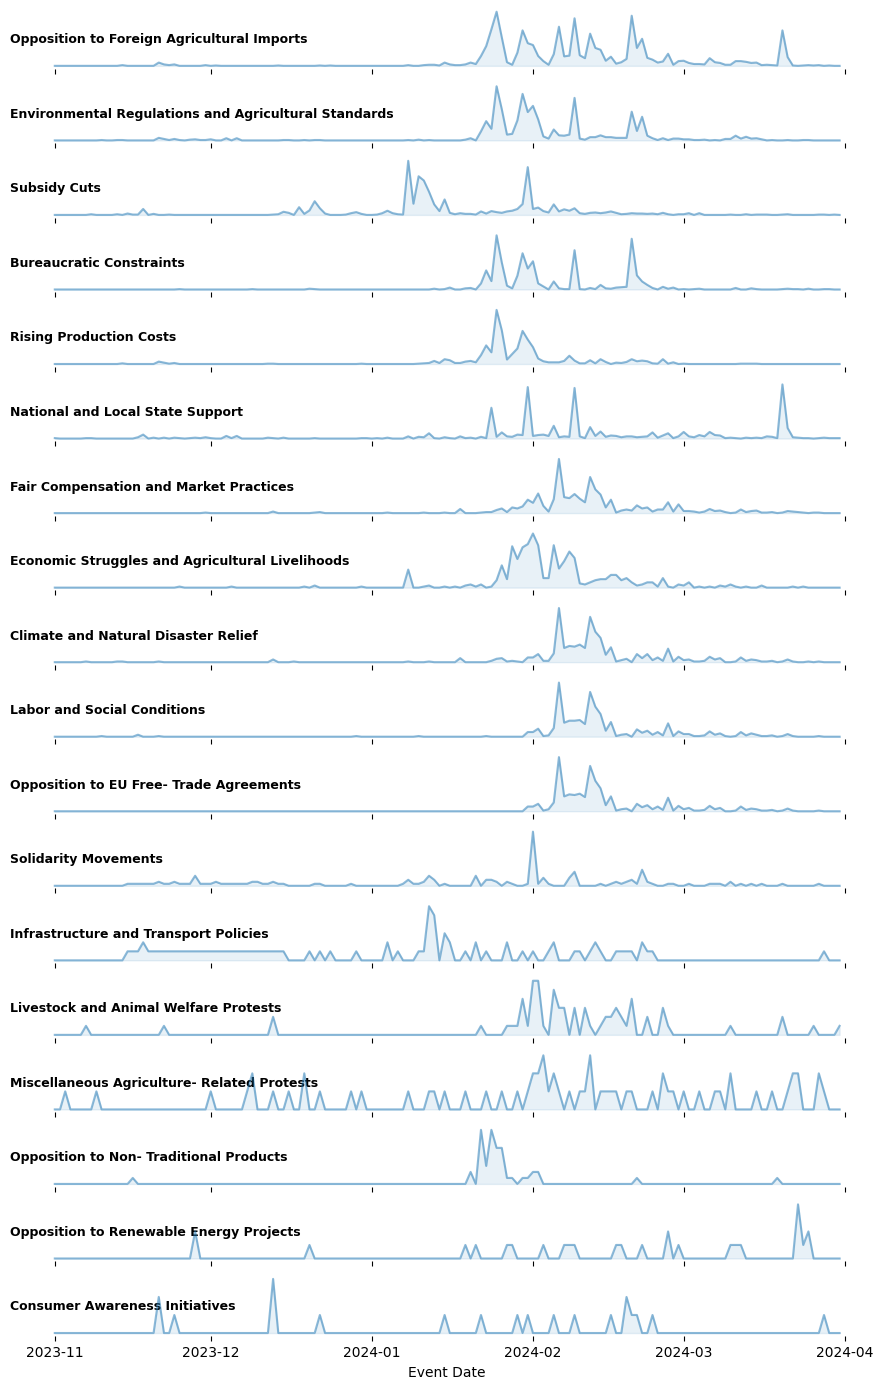

In [38]:
import matplotlib.pyplot as plt

# Replace \n with space in column names
grouped_data.columns = grouped_data.columns.str.replace("\n", " ")

# Number of columns
n_cols = grouped_data.shape[1]

fig, axes = plt.subplots(
    nrows=n_cols, ncols=1, 
    figsize=(9, 14), 
    sharex=True
)

for i, col in enumerate(grouped_data.columns):
    axes[i].plot(grouped_data.index, grouped_data[col], alpha=0.5, label=col, color="C0")
    axes[i].fill_between(grouped_data.index, grouped_data[col], alpha=0.1, color="C0")
    axes[i].set_ylabel(col, rotation=0, ha='left', va='center', zorder=10, fontweight="bold", fontsize=9)
    # axes[i].legend(loc="upper right", fontsize=8, frameon=False)

    # Remove y-ticks and labels
    axes[i].set_yticks([])
    axes[i].set_yticklabels([])
    
    # Remove all spines
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    
# Common x-axis label
axes[-1].set_xlabel("Event Date")

plt.savefig("../img/temporal_evol.png", dpi=600, bbox_inches="tight")
plt.tight_layout()
plt.show()


In [47]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import permutation_test
from dtaidistance import dtw


def euclidean_distance(x, y):
    """Compute Euclidean distance between two vectors."""
    return np.linalg.norm(np.array(x) - np.array(y))


def dtw_distance(x, y):
    return dtw.distance(x, y)

In [48]:
import itertools
from statsmodels.stats.multitest import multipletests


# Initialize a list to store the results of each test
results_list = []

# Get all unique pairs of column names
column_pairs = itertools.combinations(grouped_data.columns, 2)



# Loop through each column pair, run the permutation test, and store the results
for col1, col2 in tqdm(column_pairs):
    x_data = grouped_data[col1].values
    y_data = grouped_data[col2].values
    
    res = permutation_test(
        (x_data,y_data),
        statistic = euclidean_distance,
        n_resamples=10000,
        alternative="two-sided",
        permutation_type='pairings',
        random_state=42
    )
    
    results_list.append({
        'x': col1,
        'y': col2,
        'dist': res.statistic,
        'p-value': res.pvalue
    })



# Create the final DataFrame from the collected results
df_final = pd.DataFrame(results_list)



C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_resampling.py:1492: RuntimeWarning: overflow encountered in scalar power
  n_max = factorial(n_obs_sample)**n_samples
153it [01:31,  1.66it/s]


In [49]:
# Benjamini-Hochberg FDR
# Multiple hypothesis adjustment
alpha = 0.05  # significance level
pvals = df_final['p-value'].values

df_final['p_bh'] = multipletests(pvals, method='fdr_bh')[1]
df_final['sig_bh'] = df_final['p_bh'] < alpha

In [54]:
import pandas as pd
import numpy as np

# Get list of columns
cols = grouped_data.columns

# Initialize empty distance matrix
dist_matrix = pd.DataFrame(np.nan, index=cols, columns=cols)

# Fill the matrix from df_final
for _, row in df_final.iterrows():
    x = row['x']
    y = row['y']
    dist_matrix.loc[x, y] = row['dist']
    dist_matrix.loc[y, x] = row['dist']  # symmetric

# Fill diagonal with 0 (distance to self)
np.fill_diagonal(dist_matrix.values, 0)


# Initialize empty p-value matrix
cols = grouped_data.columns
pbh_matrix = pd.DataFrame(np.nan, index=cols, columns=cols)

# Fill the matrix from df_final
for _, row in df_final.iterrows():
    x = row['x']
    y = row['y']
    pbh_matrix.loc[x, y] = row['p_bh']
    pbh_matrix.loc[y, x] = row['p_bh']  # symmetric

# Fill diagonal with 1 (self-comparison)
np.fill_diagonal(pbh_matrix.values, 1)




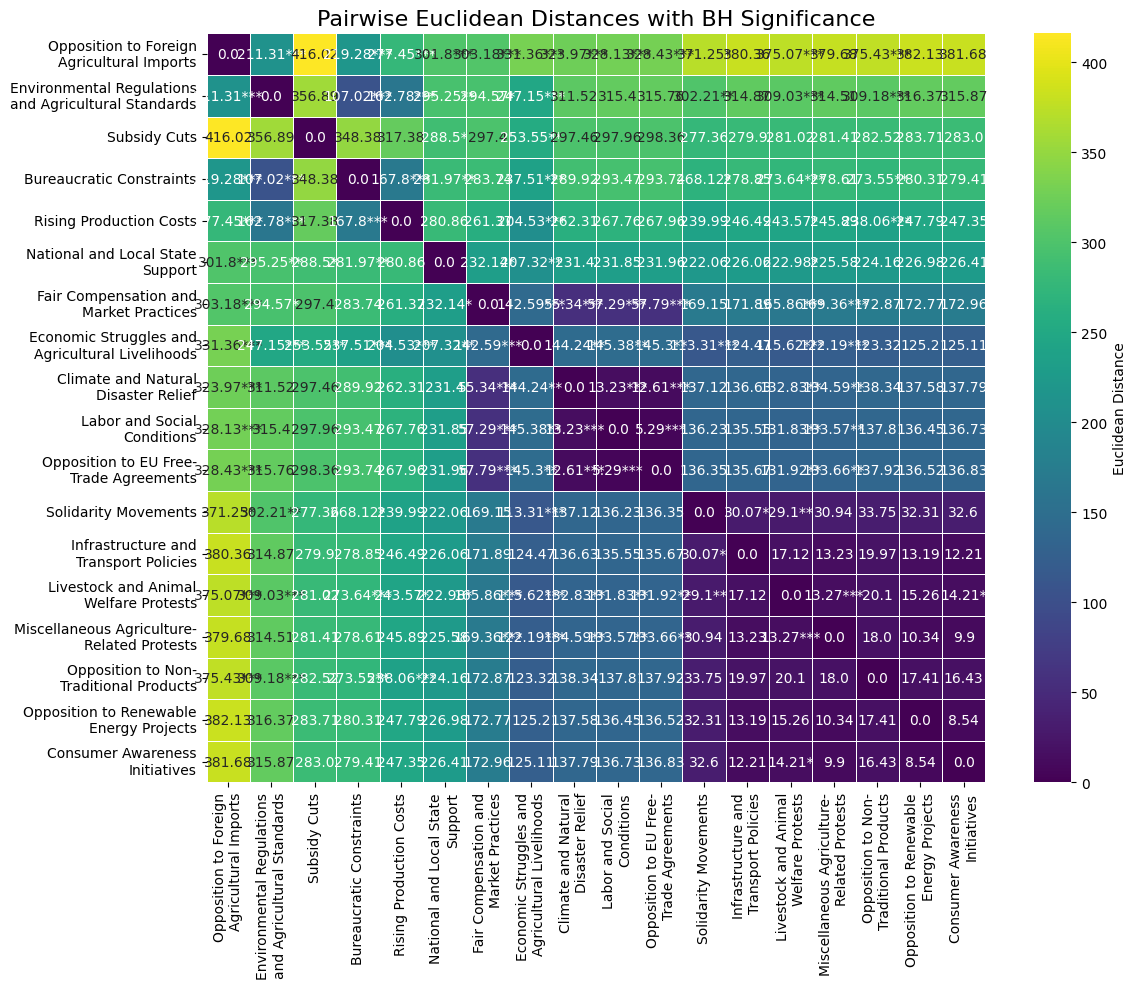

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert p-value to asterisks
def pval_to_asterisk(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Create annotation matrix: dist value + asterisks
annot_matrix = dist_matrix.round(2).astype(str)
for i in dist_matrix.index:
    for j in dist_matrix.columns:
        annot_matrix.loc[i, j] += pval_to_asterisk(pbh_matrix.loc[i, j])

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    dist_matrix,
    annot=annot_matrix,
    fmt='',
    cmap='viridis',
    cbar_kws={'label': 'Euclidean Distance'},
    linewidths=0.5,
    linecolor='white'
)
plt.title('Pairwise Euclidean Distances with BH Significance', fontsize=16)
plt.yticks(rotation=0, va='center')  # keep row labels horizontal
# plt.xticks(rotation=90, ha='right', va="bottom")  # rotate column labels
plt.xticks(rotation=90, ha='right', va='center', rotation_mode='anchor')

plt.tight_layout()
plt.show()


In [52]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.patches import Rectangle


cols = grouped_data.columns
n = len(cols)

fig = plt.figure(figsize=(1.5*n, n))
gs = gridspec.GridSpec(n, n, wspace=0.1, hspace=0.1)

for i, col_i in enumerate(cols):
    for j, col_j in enumerate(cols):
        ax = fig.add_subplot(gs[i, j])
        
        if i > j:
            # Lower triangle: distance matrix with color
            c = dist_matrix.loc[col_i, col_j]
            color = plt.cm.viridis((c - dist_matrix.values.min()) / (dist_matrix.values.max() - dist_matrix.values.min()))
            
            # Fill the entire axes with a colored rectangle
            rect = Rectangle((0, 0), width=1, height=1, transform=ax.transAxes, color=color)
            ax.add_patch(rect)
            
            # Add text annotation
            ax.text(0.5, 0.5, f"{c:.2f}\n{pval_to_asterisk(pbh_matrix.loc[col_i, col_j])}",
                    ha='center', va='center', color='white', fontsize=12)
            
            ax.set_xticks([])
            ax.set_yticks([])
            
        elif i == j:
            # Diagonal: plot the column's time series
            ax.plot(grouped_data.index, grouped_data[col_i].values, color='C0')
            ax.set_yticks([])
            ax.set_xticks([])
            
        else:
            # Upper triangle: plot x vs y values
            ax.plot(grouped_data.index, grouped_data[col_i].values, color="C0")
            ax.plot(grouped_data.index, grouped_data[col_j].values, color='C1')
            ax.set_yticks([])
            ax.set_xticks([])

        # Show x-axis labels only on bottom row
        if i == n-1:
            ax.set_xlabel(col_j, rotation=90, ha='center')
        else:
            ax.set_xticks([])

        # Show y-axis labels only on leftmost column
        if j == 0:
            ax.set_ylabel(col_i, rotation=0, ha='right', va='center')
        else:
            ax.set_yticks([])

plt.tight_layout()
plt.savefig("../img/dtw_all.png", dpi=600, bbox_inches="tight")

plt.close()


C:\Users\cstetter\AppData\Local\Temp\ipykernel_5956\4169570210.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [56]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Subset first 5 columns
cols = grouped_data.columns[:6]
dist_sub = dist_matrix.loc[cols, cols]
pbh_sub = pbh_matrix.loc[cols, cols]
data_sub = grouped_data[cols]

n = len(cols)

fig = plt.figure(figsize=(1.3*n, n))
gs = gridspec.GridSpec(n, n, wspace=0.1, hspace=0.1)

for i, col_i in enumerate(cols):
    for j, col_j in enumerate(cols):
        ax = fig.add_subplot(gs[i, j])
        
        if i > j:
            # Lower triangle: distance matrix with color
            c = dist_matrix.loc[col_i, col_j]
            color = plt.cm.viridis((c - dist_matrix.values.min()) / (dist_matrix.values.max() - dist_matrix.values.min()))
            
            # Fill the entire axes with a colored rectangle
            rect = Rectangle((0, 0), width=1, height=1, transform=ax.transAxes, color=color)
            ax.add_patch(rect)
            
            # Add text annotation
            ax.text(0.5, 0.5, f"{c:.2f}\n{pval_to_asterisk(pbh_matrix.loc[col_i, col_j])}",
                    ha='center', va='center', color='white', fontsize=12)
            
            ax.set_xticks([])
            ax.set_yticks([])
            
        elif i == j:
            # Diagonal: plot the column's time series
            ax.plot(grouped_data.index, grouped_data[col_i].values, color='C0')
            ax.set_yticks([])
            ax.set_xticks([])
            
        else:
            # Upper triangle: plot x vs y values
            ax.plot(grouped_data.index, grouped_data[col_i].values, color="C0")
            ax.plot(grouped_data.index, grouped_data[col_j].values, color='C1')
            ax.set_yticks([])
            ax.set_xticks([])

        # Show x-axis labels only on bottom row
        if i == n-1:
            ax.set_xlabel(col_j, rotation=90, ha='right', va='center', rotation_mode='anchor')
        else:
            ax.set_xticks([])

        # Show y-axis labels only on leftmost column
        if j == 0:
            ax.set_ylabel(col_i, rotation=0, ha='right', va='center')
        else:
            ax.set_yticks([])

plt.tight_layout()
plt.savefig("../img/dtw_important.png", dpi=600, bbox_inches="tight")

plt.close()


C:\Users\cstetter\AppData\Local\Temp\ipykernel_5956\2060512361.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
